# Group: Boxplot

**Members**: Naim Barnett, Susan B., and Akshay P.

---

## **Business Understanding**

India has a booming house rental market. This is due to the influx of migrants to metro cities from other parts of the country. This has also raised prices of real estate near educational institutions and workspaces such as IT parks and business hubs. Due to the increased rates of properties in these high-demand areas, people choose to live in rented spaces rather than purchasing them. 

In May 2022, a report from the Economic Times of India ([link](https://economictimes.indiatimes.com/industry/services/property-/-cstruction/rentals-in-major-indian-cities-go-up-by-1020/articleshow/91895034.cms)) stated that the rental markets have grown by 10–20% due to the opening of schools and hybrid work arrangements adopted by multiple companies in India. This has led to a growth in the number of listings on many online portals, which help customers search listings based on their finances and preferences.

As technology advances, browsing for houses online has become easier. In turn, rental portals will produce profits from analyzing user data and providing valuable predictions to user interfaces. This data can be sold to competitors or used for analysis and prediction of trends in the rental market.

**Purpose**:  
We can use the housing dataset to predict the rent price given certain features. There are various factors that affect the price of a listing, such as size, number of rooms, location, furnishing status, and preference of tenants. In this report, we will explore the relationship between various features and produce a good phase space to train our regression model.

The data was sourced from MagicBricks.com and collected as a catalog for customers on an online house renting (leasing) portal, with features such as rent amount, location, furnishing status, size, and availability. Determining the relationships between features and how they affect a listing's market value will serve as an essential aid to customers, allowing them to select key factors that reflect their financial needs and preferences.

---

## **Goal**

- To try to give a fair market value to end users (buyers or sellers) using the MagicBrick platform.
- Generate a good Rent Prediction Algorithm for the MagicBrick platform, giving it an edge over competitors.  
  Our prediction model will cater to customers who require a house on rent/buy/sell based on their individual choices. This will be unique to the type of customer we encounter.  
  Permissible accuracy and goodness of fit for the prediction task should be higher than that from a linear regression model.

---

### **Dataset**

**House Rent Prediction Dataset URL**:  
[https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv)

**Question of Interest**:  
Can we provide suitable listing recommendations based on customer needs and preferences?


## Data Understanding

### Dataset Variable Glossary (from source):

- **BHK**: Number of Bedrooms, Hall, Kitchen.
- **Rent**: Rent of the Houses/Apartments/Flats.
- **Size**: Size of the Houses/Apartments/Flats in Square Feet.
- **Floor**: Houses/Apartments/Flats situated on which floor and total number of floors.  
  _(Example: Ground out of 2, 3 out of 5, etc.)_
- **Area Type**: Size of the Houses/Apartments/Flats calculated on either **Super Area**, **Carpet Area**, or **Build Area**.
- **Area Locality**: Locality of the Houses/Apartments/Flats.
- **City**: City where the Houses/Apartments/Flats are located.
- **Furnishing Status**: Furnishing status of the Houses/Apartments/Flats — can be **Furnished**, **Semi-Furnished**, or **Unfurnished**.
- **Tenant Preferred**: Type of tenant preferred by the owner or agent.
- **Bathroom**: Number of bathrooms.
- **Point of Contact**: Whom to contact for more information regarding the property listing.

---

### Note on Area Type:

- The way the size of the property was calculated is explained in more detail at  
  [Housing.com article](https://housing.com/news/real-estate-basics-part-1-carpet-area-built-up-area-super-built-up-area/). According to this:

  - **Carpet area**: The area in the property which one can cover using a carpet.
  - **Built-up area**: Carpet area plus the area taken up by the walls, balcony, terrace, etc.
  - **Super built-up area**: Built-up area plus common areas like corridors, stairs, and lobbies.

All the area occupied by the floor is included in this measurement.


In [2]:
# OS operations (e.g., file handling, directory paths)
import os

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing (encoding categorical variables)
from sklearn.preprocessing import OneHotEncoder

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Utilities for deep copying complex objects
import copy
from copy import deepcopy

# Configure default plot style for consistent visuals
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 22


In [3]:
# Load the Housing Dataset
df= pd.read_csv("House_Rent_Dataset.csv")

# Change to lower case column names and replace space with underscore
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

# Deep copy of the dataset
df0 = copy.deepcopy(df) 
df0.head()

posted_on  bhk   rent  size            floor    area_type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              area_locality     city furnishing_status  tenant_preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   bathroom point_of_contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner  
4         1    Contact Owner

There are seven columns with categorical data which are replaced with numerical representations. The 'floor' column has current floor and total floor information for the posting and these are added as seperate columns. A 'week' variable is also add, which is 7 days range for example 1 in "week" column means posting are from first posting date to a week after that, 2 "week" is the next week and so on.

In [4]:
#  changing Categorical features into numerical value 
#  save the numerical representation of the features into a Dictionary  
# merged_cities = pd.concat([df['rent'], cities], axis = "columns")

area_type = dict(zip(df.area_type.unique(),range(1,len(df.area_type.unique())+1)))

df.area_type.replace(to_replace = df.area_type.unique(),
    value = range(1,len(df.area_type.unique())+1), inplace = True)

city = dict(zip(range(1,len(df.city.unique())+1),df.city.unique()))

df.city.replace(to_replace = df.city.unique(),
    value = range(1,len(df.city.unique())+1), inplace = True)

furnishing_status = dict(zip(df.furnishing_status.unique(),range(1,len(df.furnishing_status.unique())+1)))

df.furnishing_status.replace(to_replace = df.furnishing_status.unique(),
    value = range(1,len(df.furnishing_status.unique())+1), inplace = True)

tenant_preferred = dict(zip( df.tenant_preferred.unique(),range(1,len(df.tenant_preferred.unique())+1)))

df.tenant_preferred.replace(to_replace = df.tenant_preferred.unique(),
    value = range(1,len(df.tenant_preferred.unique())+1), inplace = True)

point_of_contact=dict(zip(df.point_of_contact.unique(),range(1,len(df.point_of_contact.unique())+1)))

df.point_of_contact.replace(to_replace = df.point_of_contact.unique(),
    value = range(1,len(df.point_of_contact.unique())+1), inplace = True)

floor = dict(zip( df.floor.unique(),range(1,len(df.floor.unique())+1)))

df.floor.replace(to_replace = df.floor.unique(),
    value = range(1,len(df.floor.unique())+1), inplace = True)

area_locality =dict(zip(df.area_locality.unique(),range(1,len(df.area_locality.unique())+1)))

df.area_locality.replace(to_replace = df.area_locality.unique(),
    value = range(1,len(df.area_locality.unique())+1), inplace = True)

# save the date as seperate datetime type.
df.posted_on = pd.to_datetime(df.posted_on)
df['DateN'] = df['posted_on']
date_temp = dict(zip(sorted(df.DateN.unique()),range(1,len(df.posted_on.unique())+1)))

df.DateN.replace(to_replace = sorted(df.DateN.unique()),
    value = range(1,len(df.DateN.unique())+1), inplace = True)

The Numerical representation for the categorical data is displayed below.

In [5]:
# Referenced city later so make a dummy city1 to make the table.
city1 = dict(zip(df0.city.unique(),range(1,len(df0.city.unique())+1)))

df_keys = pd.DataFrame({"area_type":area_type,
    "city":city1,
    "furnishing_status":furnishing_status,
    "tenant_preferred":tenant_preferred,
    "point_of_contact":point_of_contact, 
    }).fillna("")
df_keys

area_type city furnishing_status tenant_preferred  \
Super Area             1.0                                           
Carpet Area            2.0                                           
Built Area             3.0                                           
Kolkata                     1.0                                      
Mumbai                      2.0                                      
Bangalore                   3.0                                      
Delhi                       4.0                                      
Chennai                     5.0                                      
Hyderabad                   6.0                                      
Unfurnished                                   1.0                    
Semi-Furnished                                2.0                    
Furnished                                     3.0                    
Bachelors/Family                                               1.0   
Bachelors                                                      2.0   
Family                                                         3.0   
Contact Owner                                                        
Contact Agent                                                        
Contact Builder                                                      

                 point_of_contact  
Super Area                         
Carpet Area                        
Built Area                         
Kolkata                            
Mumbai                             
Bangalore                          
Delhi                              
Chennai                            
Hyderabad                          
Unfurnished                        
Semi-Furnished                     
Furnished                          
Bachelors/Family                   
Bachelors                          
Family                             
Contact Owner                 1.0  
Contact Agent                 2.0  
Contact Builder               3.0

Nominal values converted to numerical values (shown above).

In [6]:
df_keys = pd.DataFrame({
    "floor":floor, 
})
df_keys

floor
Ground out of 2       1
1 out of 3            2
1 out of 2            3
Ground out of 1       4
Ground out of 4       5
...                 ...
Ground out of 15    476
Ground out of 27    477
15 out of 30        478
12 out of 30        479
23 out of 34        480

[480 rows x 1 columns]

As shown in the example above, without parsing there are almost 500 different combination of total floor and current floor.

In [7]:
df_keys = pd.DataFrame({
    "area_locality":area_locality,
})
df_keys

area_locality
Bandel                                    1
Phool Bagan, Kankurgachi                  2
Salt Lake City Sector 2                   3
Dumdum Park                               4
South Dum Dum                             5
...                                     ...
Saket, Secunderabad                    2231
Vinayaka Nagar                         2232
BN Reddy Nagar                         2233
Godavari Homes, Quthbullapur           2234
Manikonda, Hyderabad                   2235

[2235 rows x 1 columns]

There are more than 2000 different entry for area_locality column. We decided not to further analyze this data as it was a redundant set of data to 'city' data.

In [8]:
# extract total floor and current floor values from floor column 
# There was only one entry with "Ground" for which total floor is 1 and current floor is 0. wherever there are underground room only then it will be ground as 0, lower as -2 and upper as -1.
# There was two entry with as "1" and one as "3" which are taken as current floor and total floor is equal to that number. 

total_floor=[]
current_floor=[]
for f in df0.floor:
    if f[-2:].replace(' ','').isdigit():
        total_floor.append(int(f[-2:].replace(' ','')))
        
        if f[:-2].replace('out of','').replace(' ','').isdigit()==True:
            current_floor.append(int(f[:-2].replace('out of','').replace(' ','')))
        elif "Ground" in f[:-2].replace('out of','').replace(' ','') and f[:-2].replace('out of','').replace(' ','').isdigit()==False:
            current_floor.append(0)
        elif "Lower" in f[:-2].replace('out of','').replace(' ','')and f[:-2].replace('out of','').replace(' ','').isdigit()==False:
            current_floor.append(-2)
        elif "Upper" in f[:-2].replace('out of','').replace(' ','')and f[:-2].replace('out of','').replace(' ','').isdigit()==False:
            current_floor.append(-1)
        else:
            current_floor.append(int(f))

    else:
        if "Ground" in f:
            total_floor.append(1)
            current_floor.append(0)
        if "Lower" in f:
            total_floor.append(1)
            current_floor.append(-2)
        if "Upper" in f:
            total_floor.append(1)
            current_floor.append(-1)
df['total_floor']=pd.DataFrame(total_floor)
df['current_floor']= pd.DataFrame(current_floor)
df0['total_floor']=pd.DataFrame(total_floor)
df0['current_floor']= pd.DataFrame(current_floor)

In [9]:
#For numerical date  
df_keys = pd.DataFrame({
    "DateN":date_temp, 
})
df_keys

DateN
2022-04-13      1
2022-04-23      2
2022-04-24      3
2022-04-25      4
2022-04-26      5
...           ...
2022-07-07     77
2022-07-08     78
2022-07-09     79
2022-07-10     80
2022-07-11     81

[81 rows x 1 columns]

The floor columns is parsed into two columns as follows.

In [10]:
df_keys = pd.DataFrame({
    "total_floor":total_floor, 
    "current_floor": df.current_floor
})
df_keys

total_floor  current_floor
0               2              0
1               3              1
2               3              1
3               2              1
4               2              1
...           ...            ...
4741            5              3
4742            4              1
4743            5              3
4744           34             23
4745            5              4

[4746 rows x 2 columns]

Stacked historgram of current floor and total floor of the posting. Let's zoom in to 10 floors.

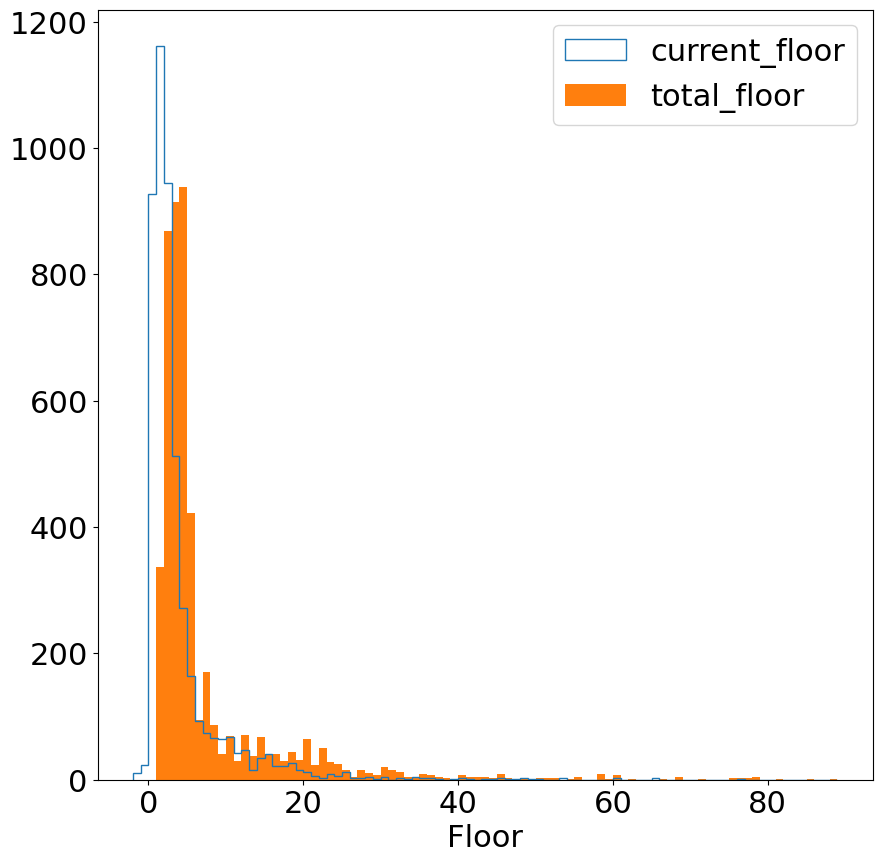

In [11]:
plt.figure(figsize=[10,10])
t = plt.hist(df.current_floor,bins=range(-2,90),label='current_floor',histtype='step')
plt.hist(df.total_floor,bins=range(-2,90),label='total_floor')
plt.xlabel('Floor')
plt.legend()
plt.show()

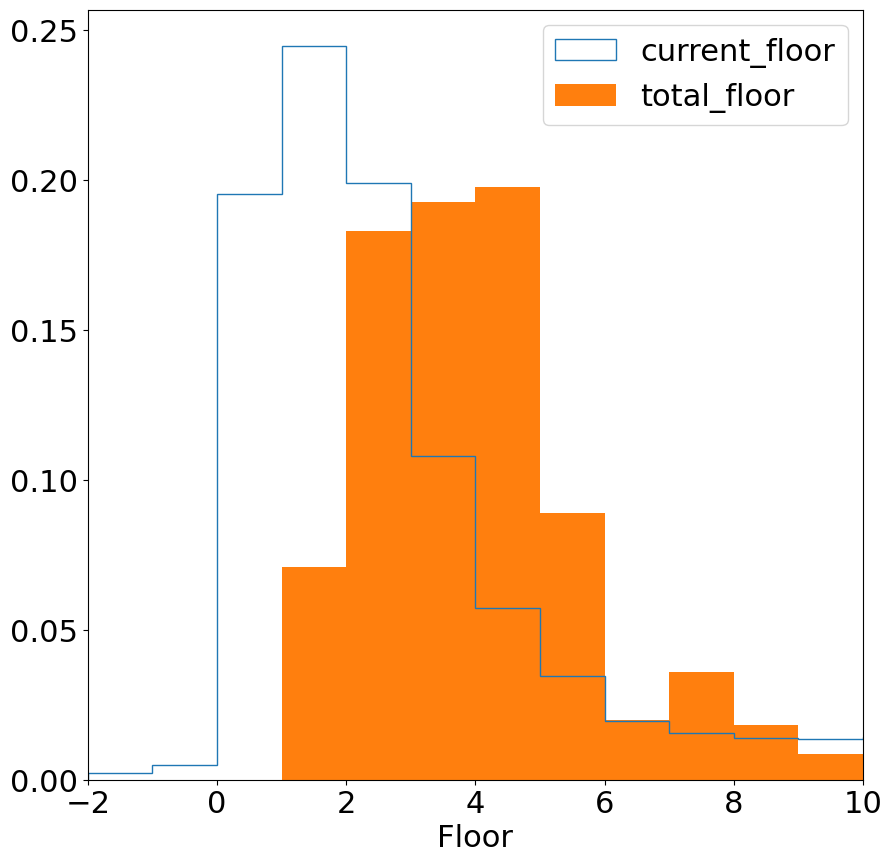

In [12]:
plt.figure(figsize=[10,10])
t = plt.hist(df.current_floor,bins=range(-2,90),density=True,label='current_floor',histtype='step')
plt.hist(df.total_floor,bins=range(-2,90),density=True,label='total_floor')
plt.xlim(-2,10)
plt.xlabel('Floor')
plt.legend()
plt.show()

We can see for the normalized histogram above almost 25% of the current floor are 1st floor and 20% are Ground and 2nd floor, while 20% of total floor in the dataset consist of 2nd, 3rd and 4th floors buildings. Below is a statistical discription of these two columns.

In [13]:
df[["current_floor","total_floor"]].describe()

current_floor  total_floor
count    4746.000000  4746.000000
mean        3.436157     6.968816
std         5.773950     9.467101
min        -2.000000     1.000000
25%         1.000000     2.000000
50%         2.000000     4.000000
75%         3.000000     6.000000
max        76.000000    89.000000

In [17]:
# from the minimum and maximum dates get the 7 day range using pd.date_range()
drange=pd.date_range(start=df.posted_on.min(),end=df.posted_on.max(),freq='7D')
print( "7 Day range:= \n ",drange)
print(" Sorted Posting dates:= \n",df.posted_on.sort_values())
print('There are ',len(df.posted_on.unique()),' unique date of data collecting.')

7 Day range:= 
  DatetimeIndex(['2022-04-13', '2022-04-20', '2022-04-27', '2022-05-04',
               '2022-05-11', '2022-05-18', '2022-05-25', '2022-06-01',
               '2022-06-08', '2022-06-15', '2022-06-22', '2022-06-29',
               '2022-07-06'],
              dtype='datetime64[ns]', freq='7D')
 Sorted Posting dates:= 
 1222   2022-04-13
244    2022-04-23
418    2022-04-23
303    2022-04-23
413    2022-04-23
          ...    
4368   2022-07-10
4126   2022-07-10
4546   2022-07-10
3743   2022-07-10
3552   2022-07-11
Name: posted_on, Length: 4746, dtype: datetime64[ns]
There are  81  unique date of data collecting.


In [21]:
# from the minimum and maximum dates get the 7 day range using pd.date_range()
#https://pandas.pydata.org/pandas-docs/version/1.1/reference/api/pandas.date_range.html

drange=pd.date_range(start=df.posted_on.min(),end=df.posted_on.max(),freq='7D')

# temp dict to keep the dataset
df_groped_date=dict()


# for the current dataset the two first datarange with incluce only one sample so there are exclued for range and merged to the third range. To not hand wrie, have to check the len of dataset after the filter.
# The dataset is then split 12 ways and grouped along roughly seven days average. The last range in from the last value in the drange to the last date.

for i in range(len(drange)+1):
    if i==0:
        continue
    elif i ==1:
        continue
    elif i ==2:
        df_groped_date[i-1]=deepcopy(df[(df.posted_on>=drange[0]) & (df.posted_on<drange[i])])
    elif i>=len(drange):
        df_groped_date[i-1]=deepcopy(df[(df.posted_on>=drange[i-1])])
    else:
        df_groped_date[i-1]=deepcopy(df[(df.posted_on>=drange[i-1]) & (df.posted_on<drange[i])])

# add "week" column in each dataset
for i in df_groped_date.keys():
    df_groped_date[i]['week']=i

# concat all the dataset in one grouped dataset with, "week" column
df_grouped_week=pd.concat(list(df_groped_date.values()))

#change the original dataframe's index to match the concated dataframe with week group.
df0=df0.iloc[list(df_grouped_week.week)]
df0['week']=df_grouped_week.week

## Data Table

After adding the week column we have the following table:

In [22]:
df_grouped_week

posted_on  bhk   rent  size  floor  area_type  area_locality  city  \
53   2022-04-23    2  15000  1000      1          1             34     1   
109  2022-04-25    1   6000   220      1          1             76     1   
125  2022-04-25    2  18000  1300      7          1             19     1   
140  2022-04-25    2  12500   750      2          2             92     1   
183  2022-04-25    2  11000   550      9          2            119     1   
...         ...  ...    ...   ...    ...        ...            ...   ...   
4737 2022-07-07    3  15000  1500     30          1           2187     6   
4738 2022-07-06    2  17000   855     10          2           2234     6   
4739 2022-07-06    2  25000  1040     18          2           1922     6   
4743 2022-07-10    3  35000  1750     26          2           1897     6   
4744 2022-07-06    3  45000  1500    480          2           1922     6   

      furnishing_status  tenant_preferred  bathroom  point_of_contact  DateN  \
53                    1                 1         2                 1      2   
109                   3                 1         1                 1      4   
125                   1                 1         2                 1      4   
140                   1                 1         2                 1      4   
183                   1                 1         1                 1      4   
...                 ...               ...       ...               ...    ...   
4737                  2                 1         3                 1     77   
4738                  1                 2         2                 2     76   
4739                  1                 2         2                 1     76   
4743                  2                 1         3                 2     80   
4744                  2                 3         2                 2     76   

      total_floor  current_floor  week  
53              2              0     1  
109             2              0     1  
125             1              1     1  
140             3              1     1  
183             3              2     1  
...           ...            ...   ...  
4737            2             -2    12  
4738            5              4    12  
4739            4              2    12  
4743            5              3    12  
4744           34             23    12  

[4746 rows x 16 columns]

In [23]:
# create a data description table
data_des = pd.DataFrame()

data_des['Features'] = df_grouped_week.columns
data_des['Description'] = ['Posting Date', 'Number of Bedrooms',
                          'Rent', 'Size','Floor(current+total) location ',
                          'Size type','Location in City', 'City ',
                           'Furnishing ',
                          'Tenant', 'Number of Bathrooms','Contact','Ordred Numerical representation of Date',
                          'total floor','current floor','week']

data_des

Features                              Description
0           posted_on                             Posting Date
1                 bhk                       Number of Bedrooms
2                rent                                     Rent
3                size                                     Size
4               floor           Floor(current+total) location 
5           area_type                                Size type
6       area_locality                         Location in City
7                city                                    City 
8   furnishing_status                              Furnishing 
9    tenant_preferred                                   Tenant
10           bathroom                      Number of Bathrooms
11   point_of_contact                                  Contact
12              DateN  Ordred Numerical representation of Date
13        total_floor                              total floor
14      current_floor                            current floor
15               week                                     week

## Data Quality

Before we run analysis, we should clean the dataset and check for duplicates. As shown below, there are no null values in the dataset, and there are no duplicate entries.

In [24]:
# To check null/empty values
df_grouped_week.isnull().sum()

posted_on            0
bhk                  0
rent                 0
size                 0
floor                0
area_type            0
area_locality        0
city                 0
furnishing_status    0
tenant_preferred     0
bathroom             0
point_of_contact     0
DateN                0
total_floor          0
current_floor        0
week                 0
dtype: int64

In [25]:
# Find the duplicate entries
fde = df.duplicated()

# Number of duplicate
dup_len = len(df[fde])
print('There are', dup_len, 'duplicate entries.')

There are 0 duplicate entries.


There are 0 duplicate entries.

## Data Relations

The below data relations table will be used to determine which features to use for our data visualiztion analysis.

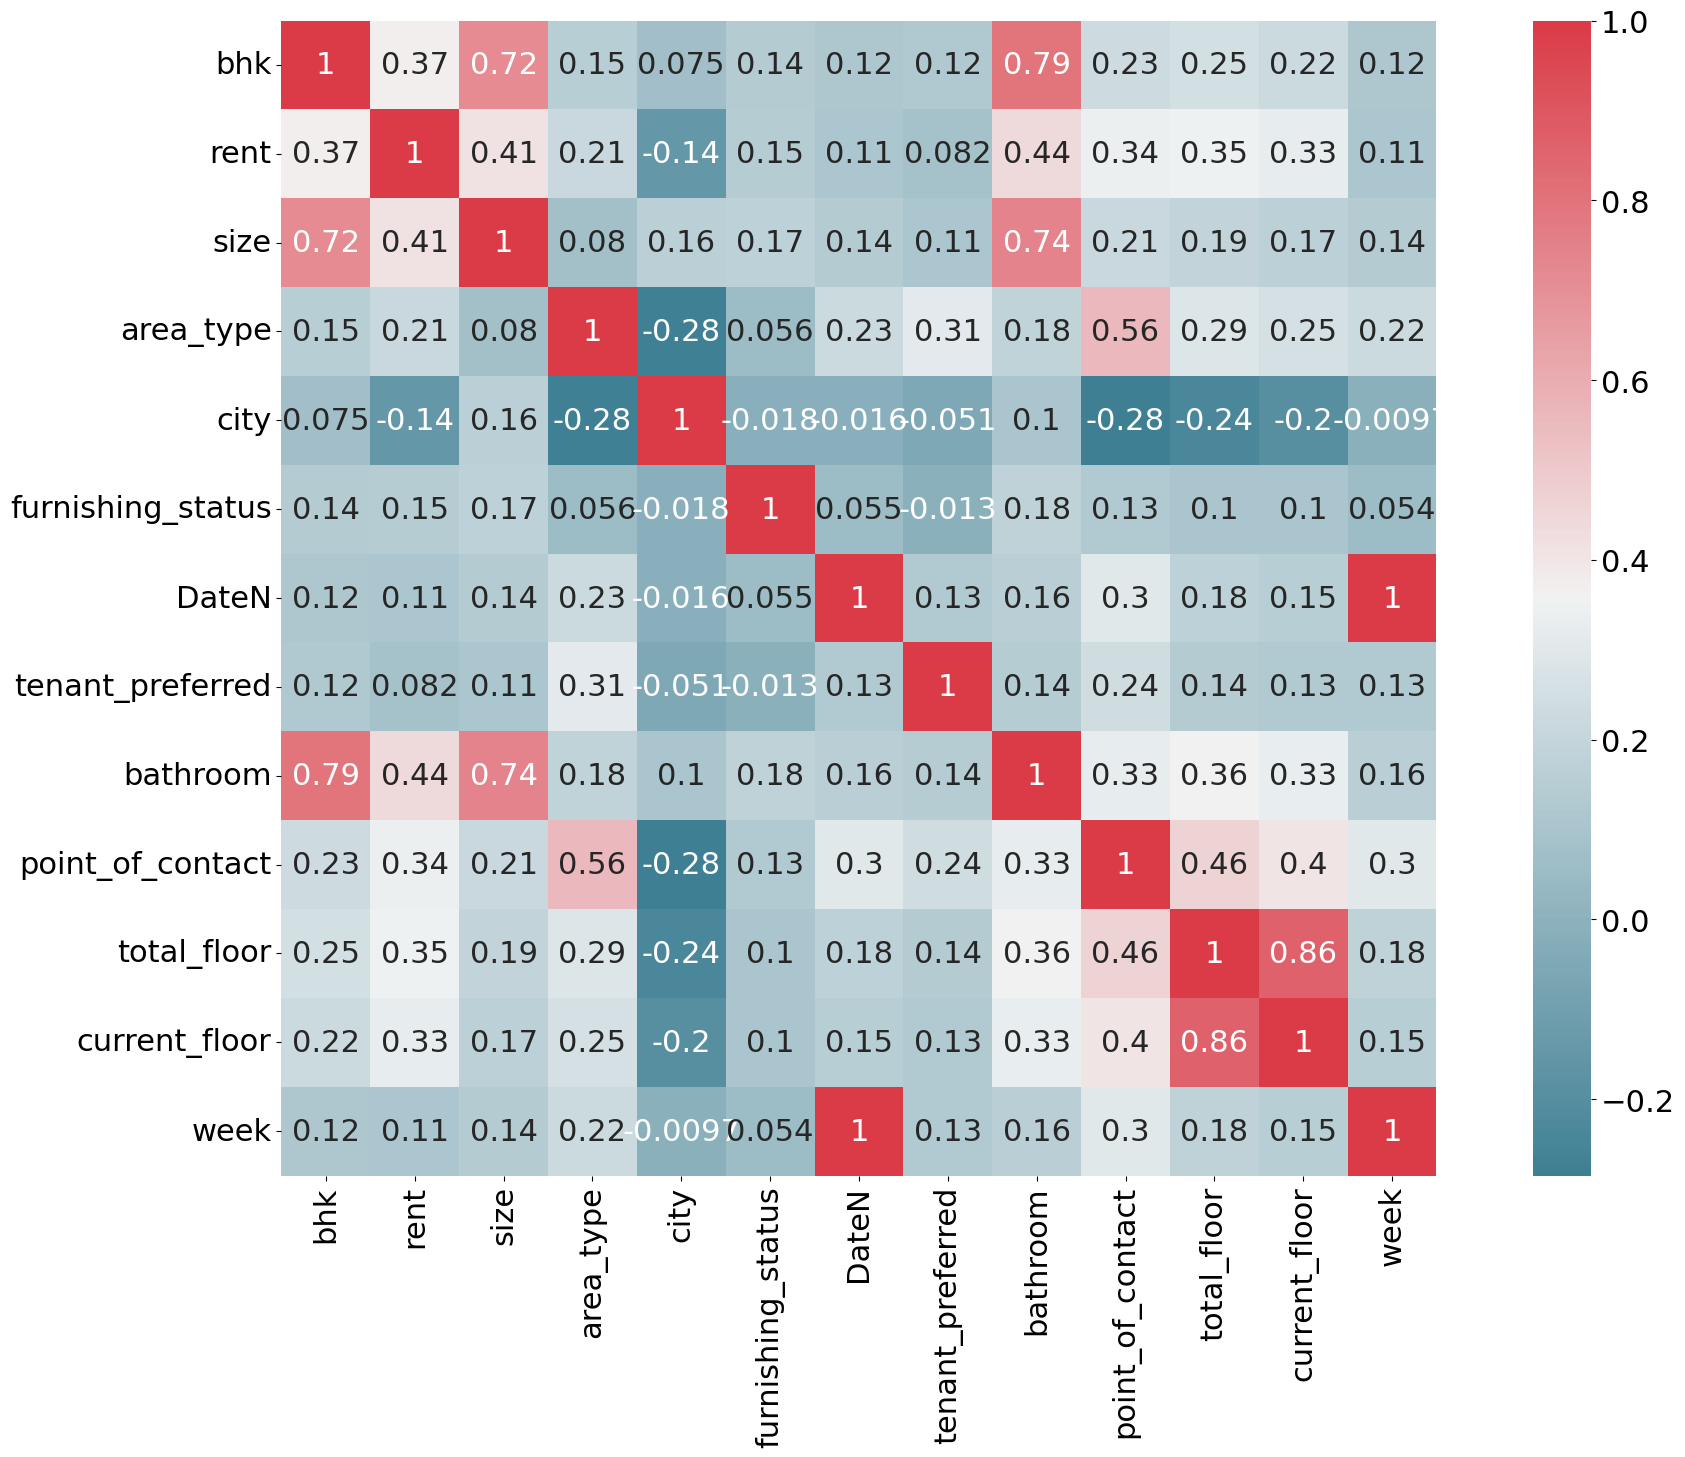

In [27]:
var_to_use = ["bhk","rent","size","area_type","city","furnishing_status","DateN","tenant_preferred","bathroom","point_of_contact","total_floor","current_floor","week"]
plt.figure(figsize=(25, 15))
corr=df_grouped_week[var_to_use].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.show()

The highest calculated correlated features are 'total_floor'-'current_floor' (0.86), 'bhk' - 'bathroom' (0.79), 'size' - 'bathroom' (0.74), and 'size' - 'bhk' (0.72). If we treat 'bhk' and 'bathrrom' as a sub-category to 'size', we can opt. 'bhk' and'bathroom' out of our analysis, and use 'size' as our main feature to compare against 'rent'. This explains why 'rent' - 'bhk', 'rent' - 'bathroom', and 'rent' - 'size' all have similar correlation factors (0.37, 0.44, and 0.41, respectively), where 0.41 is approximately the average of 0.37 and 0.44.

Also note that, 'total_floor' and 'current_floor' have almost same releationship with the whole dateset. This is also true for Number of bathroom, bedroom and size column.

And, obviously DateN and week columns are the same time data but with different range.

We can answer one intresting question, Can we reduce the total number of variable? Yes, look at most variable are correlated and could be removed.

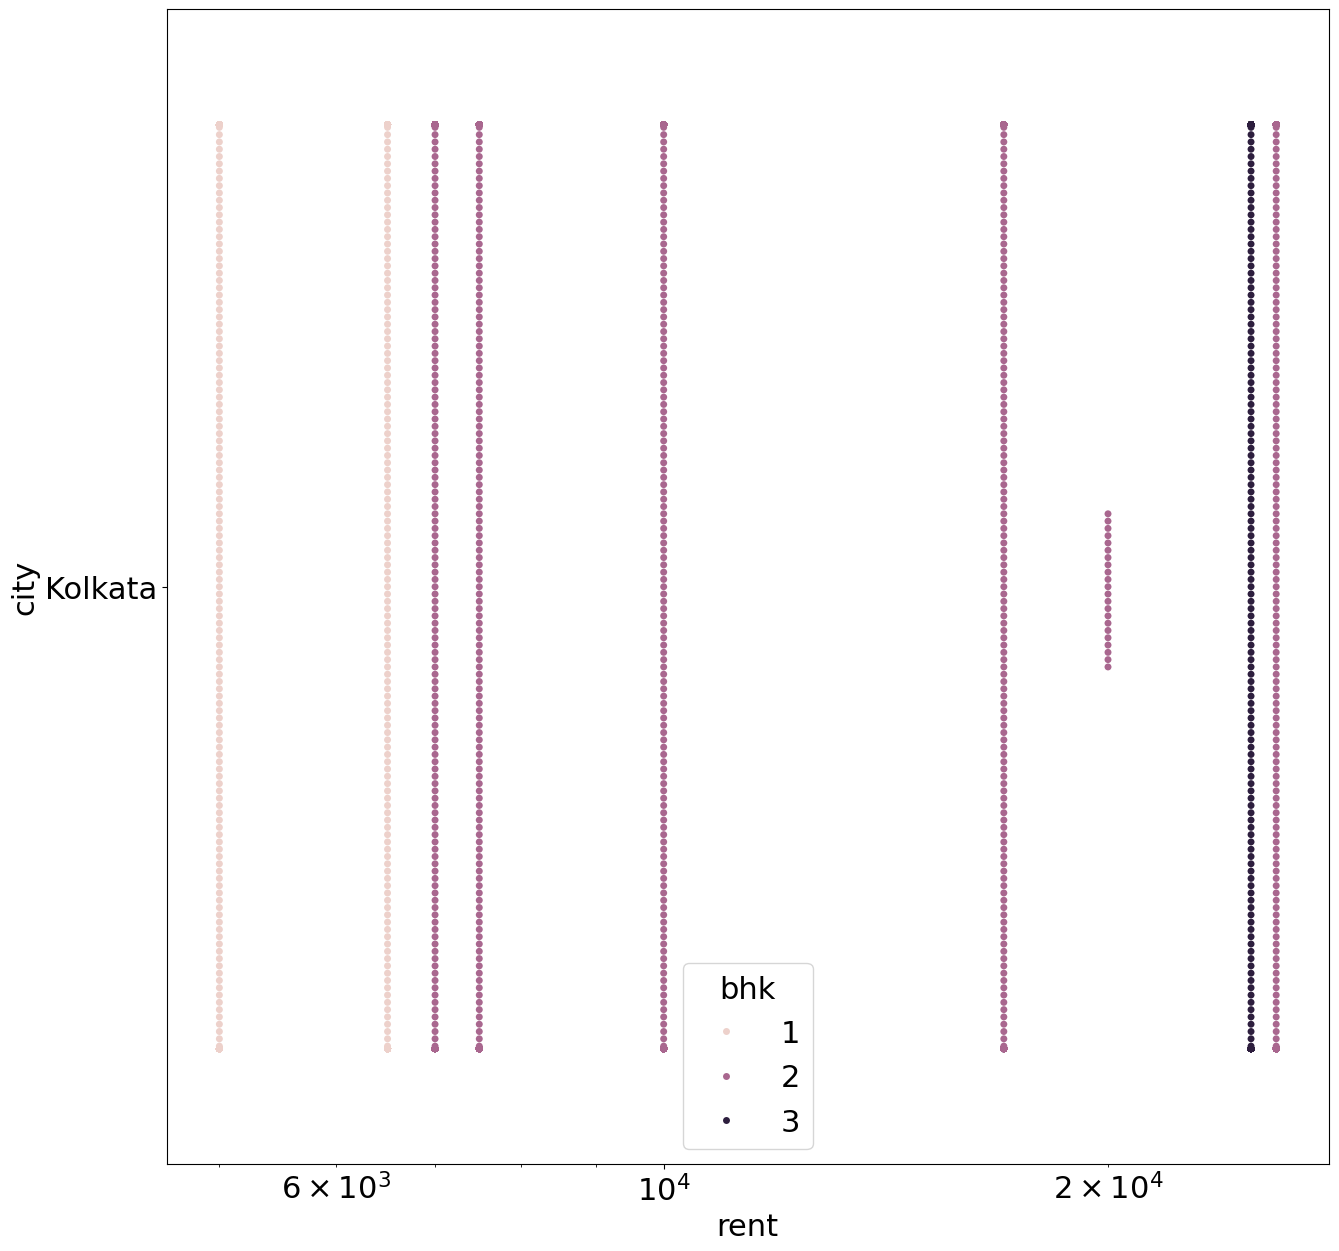

In [28]:
plt.figure(figsize=(15,15))
sns.swarmplot(data=df0, x="rent", y="city",hue='bhk' )
plt.xscale("log")
plt.show()

Question: How does rent vary based on the city?
From the Swarm plot and the Box plot below we can see the rent in different cities, Mumbai have higest rate than anywhere, average rent of Kolkata is less that 25% of all other cities. Excpet Mumbai and Kolkata rent everwhere is very similar.

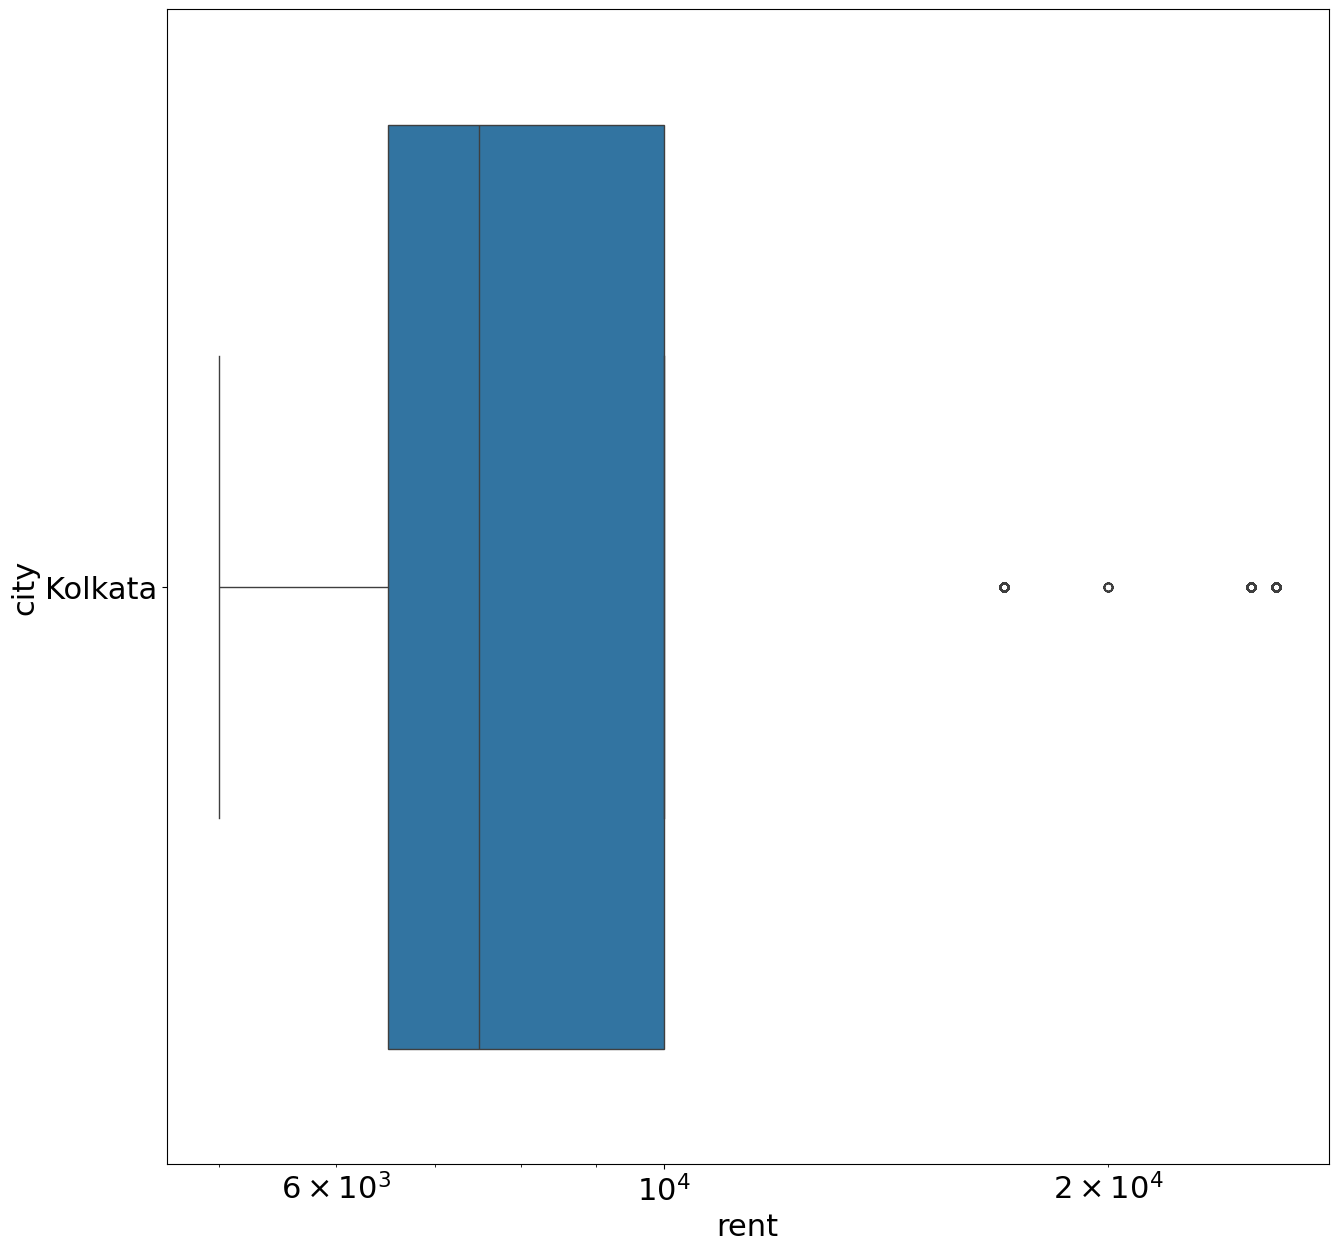

In [29]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df0, x="rent", y="city")
plt.xscale('log')

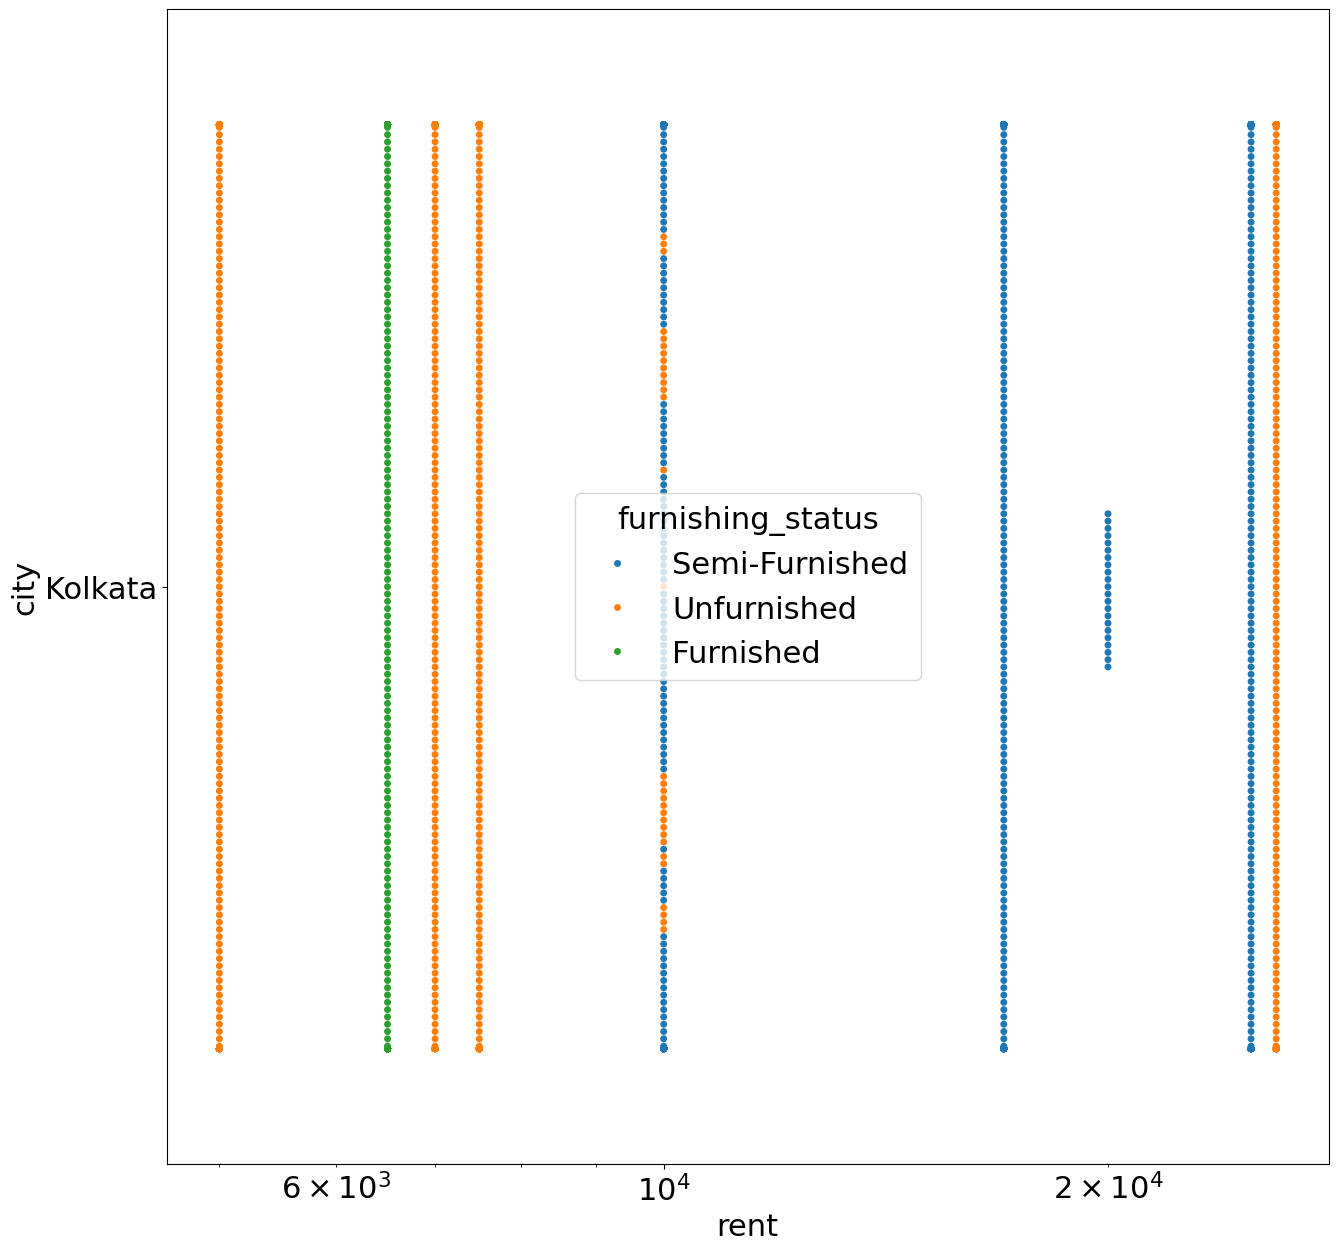

In [30]:
plt.figure(figsize=(15,15))
sns.swarmplot(data=df0, x="rent", y="city",hue='furnishing_status' )
plt.xscale("log")
plt.show()

From the above figure, we can see there is no direct correlation to 'rent' price and 'furnishing_status' in each city.

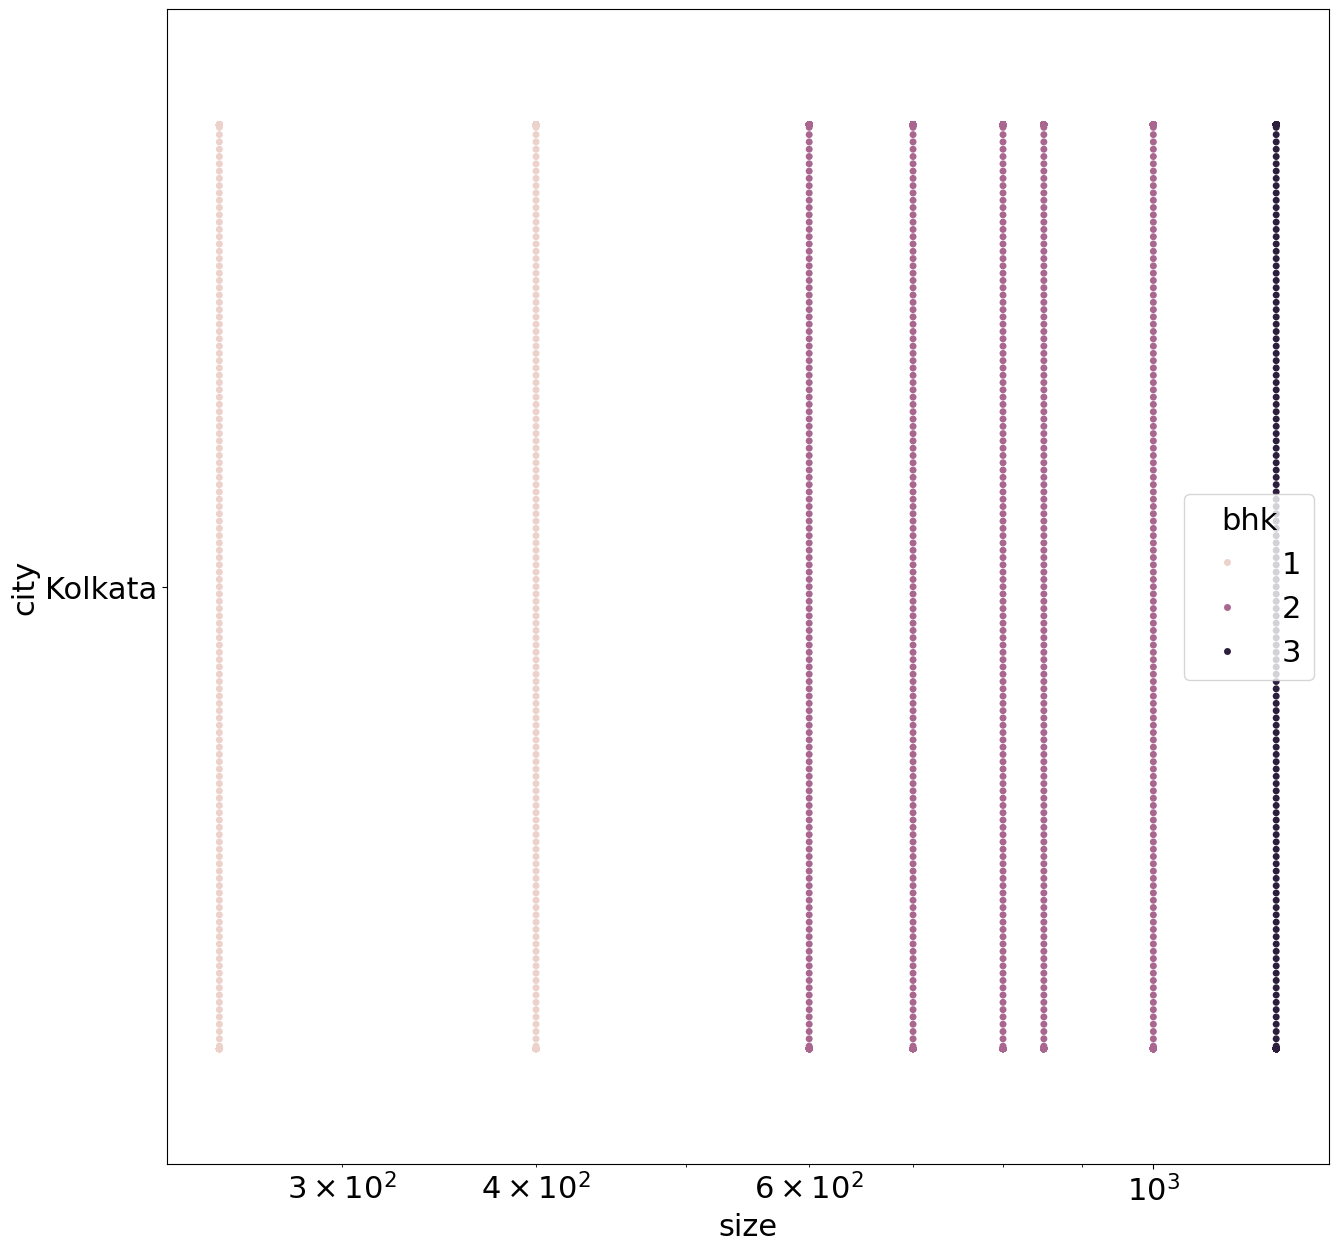

In [31]:
plt.figure(figsize=(15,15))
sns.swarmplot(data=df0, x="size", y="city",hue='bhk' )
plt.xscale("log")
plt.show()

From this graph above, we can see Delhi has majority of the small footprint houses. Note: the 'bhk' is a direct correlation to 'size'.

## Data Visulization

Let's first see the rent price vs time graph.

The dots represent the rent and time posted value, the line the mean of each point and the shaded region encompasses 95% of the total data.

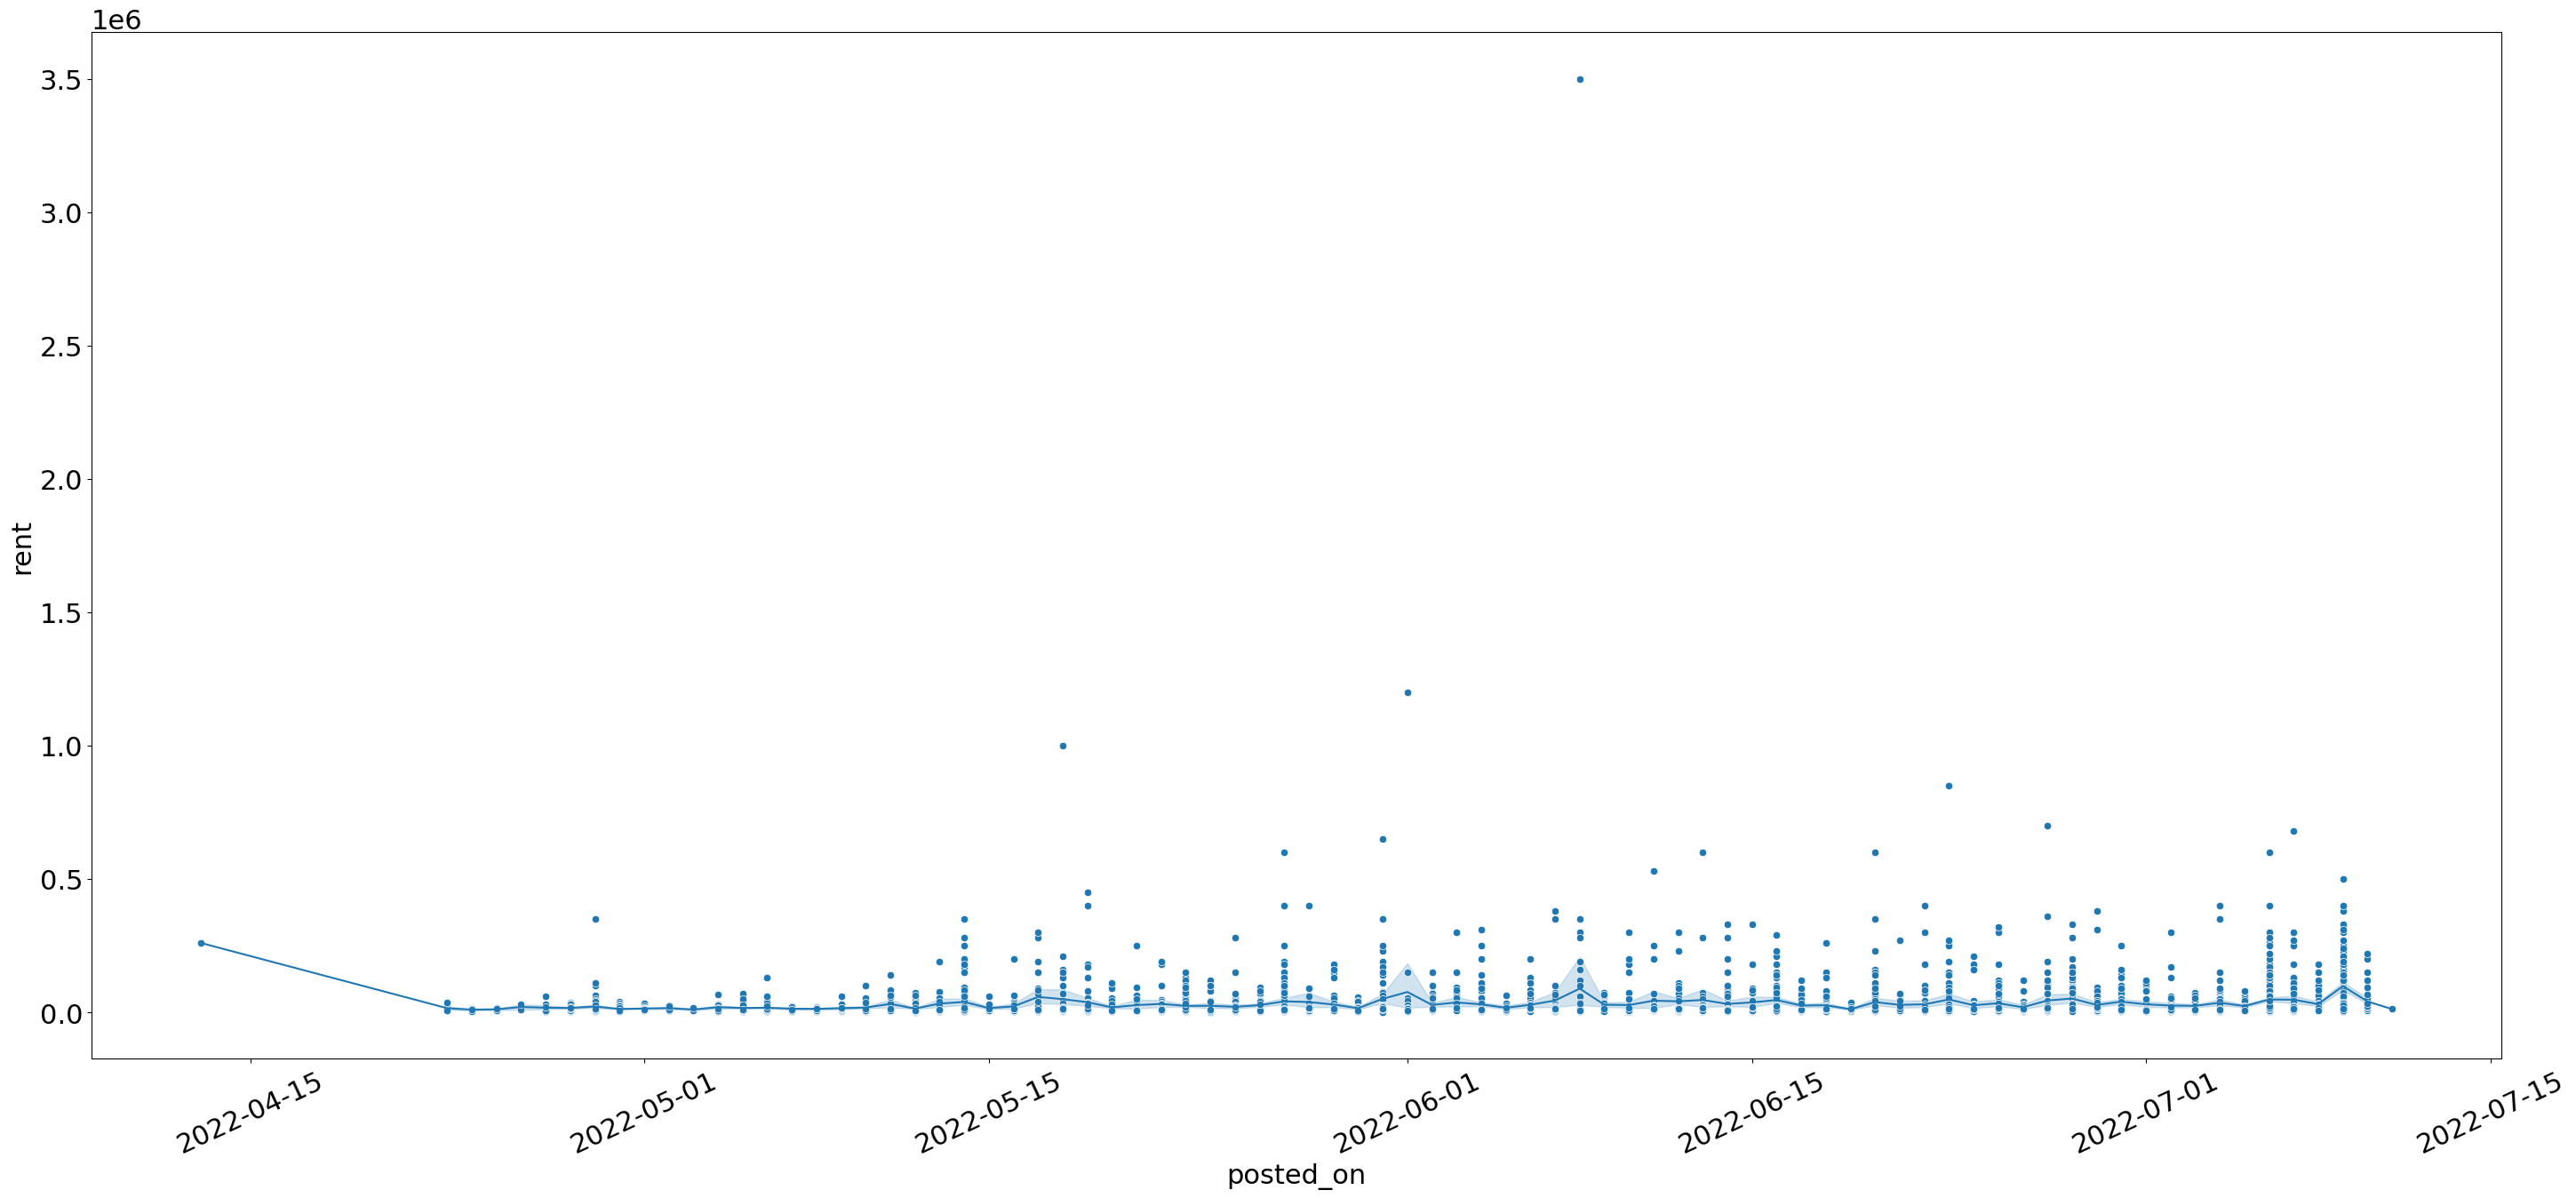

In [32]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="posted_on", y="rent",
             data=df_grouped_week)
sns.scatterplot(x="posted_on", y="rent",
#              hue="city",
             data=df_grouped_week)
plt.xticks( rotation=25 )
# plt.yscale('log')
plt.show()

Now, we change the y-axis (rent) to log scale for better trend clarity.

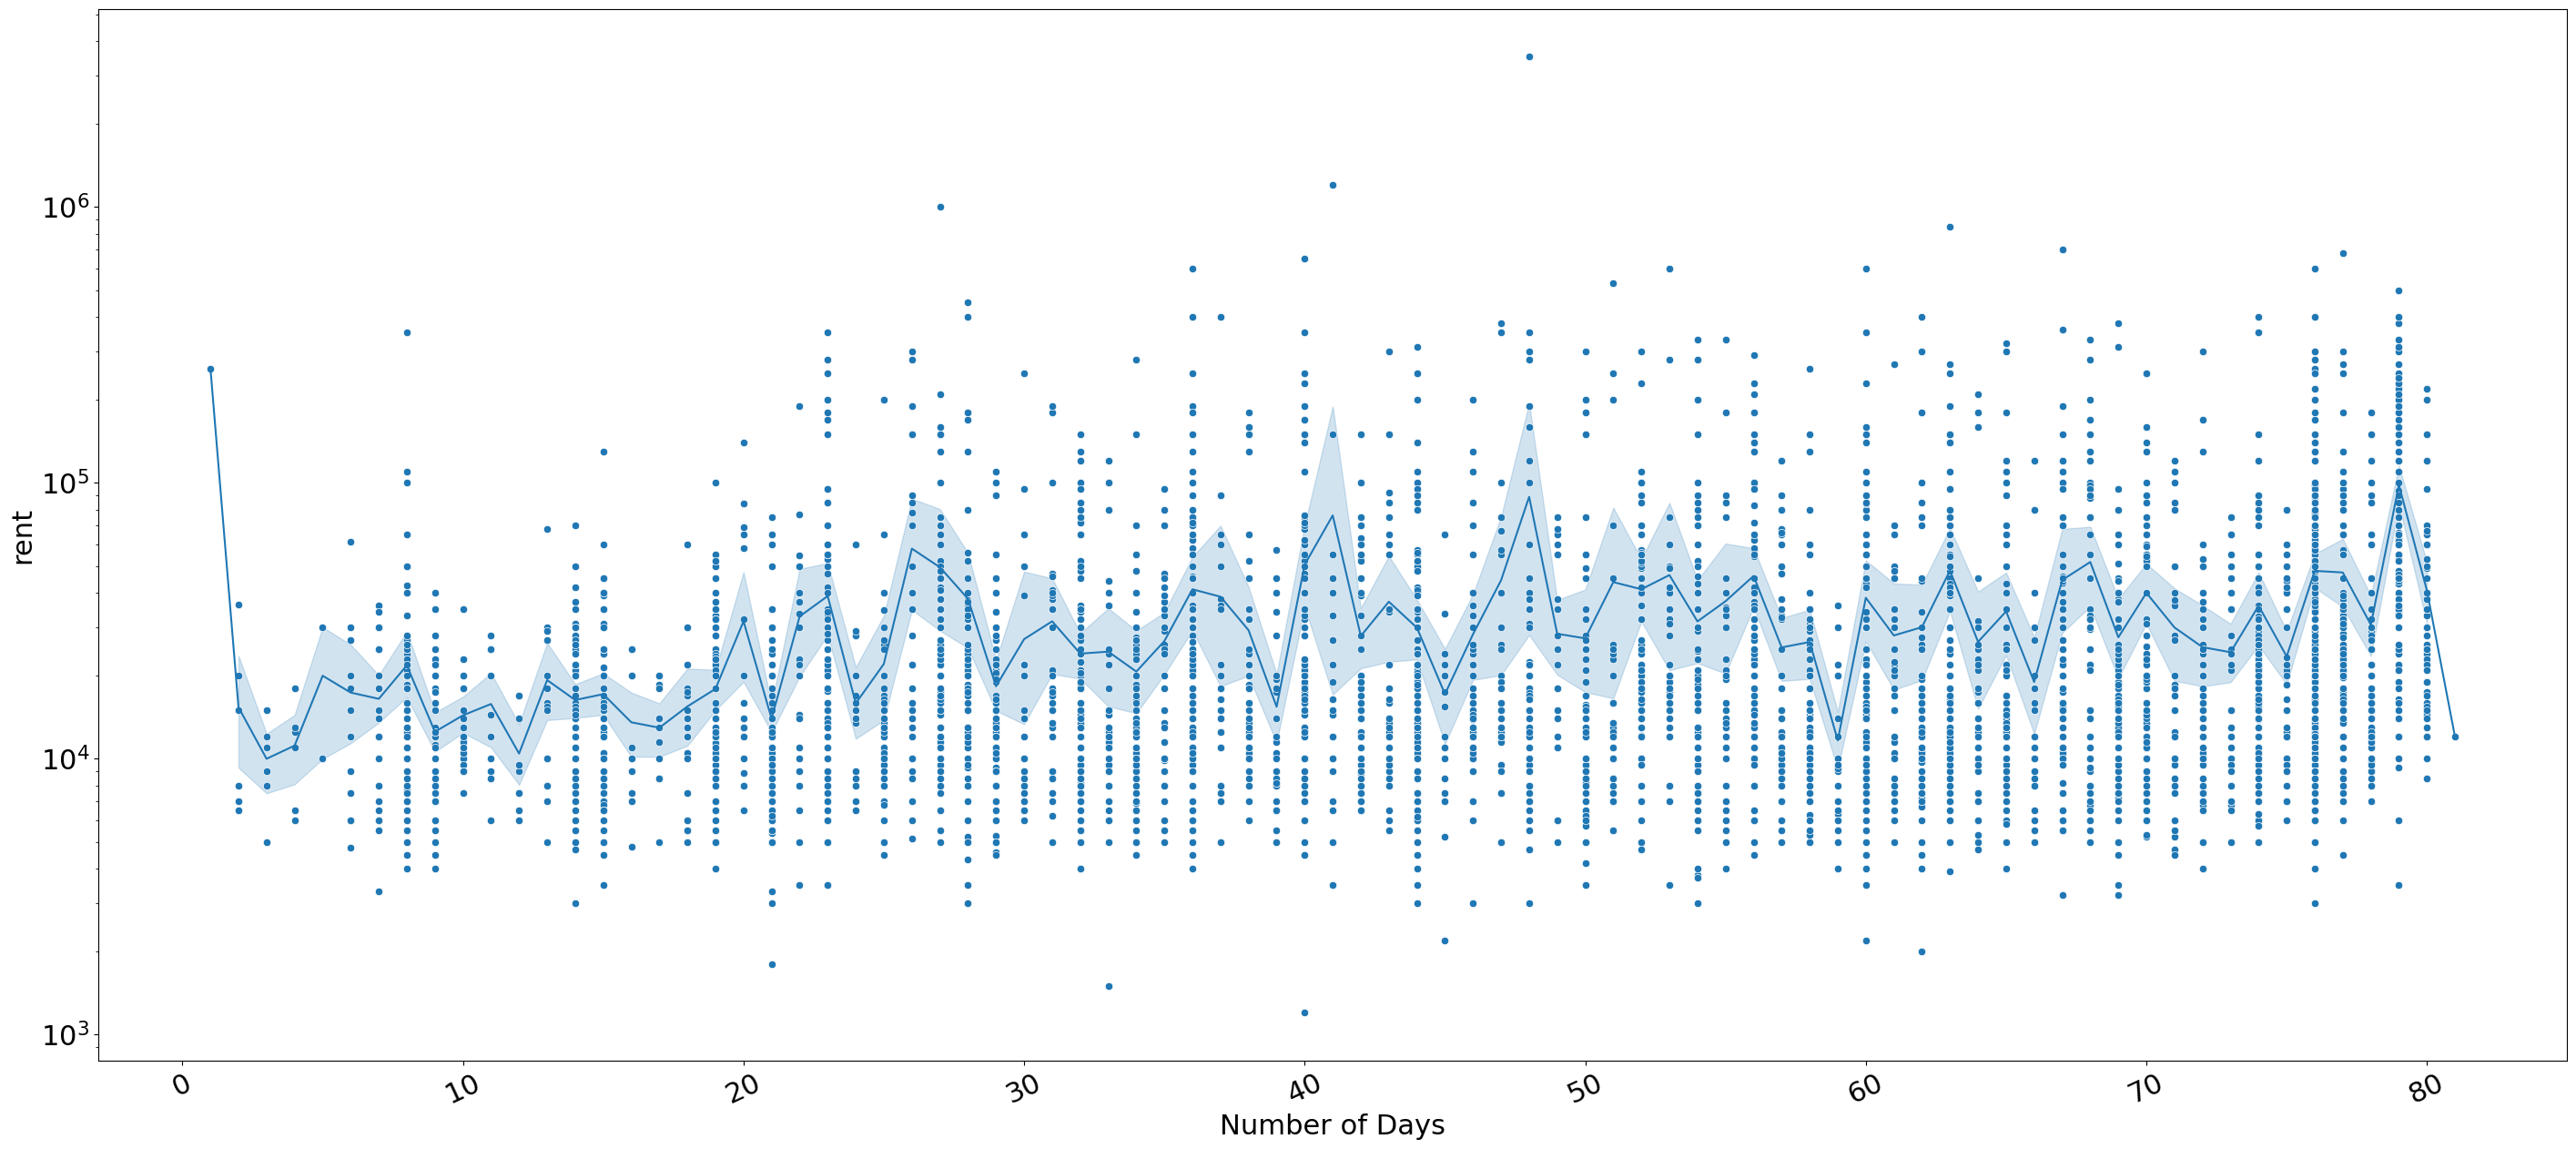

In [33]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="DateN", y="rent",
             data=df_grouped_week)
sns.scatterplot(x="DateN", y="rent",
#              hue="city",
             data=df_grouped_week)

plt.xticks( rotation=25 )
plt.xlabel('Number of Days')
plt.yscale('log')
plt.show()

To approximate the linear rent regression, first let's convert the x-axis to a seven day average of the date.

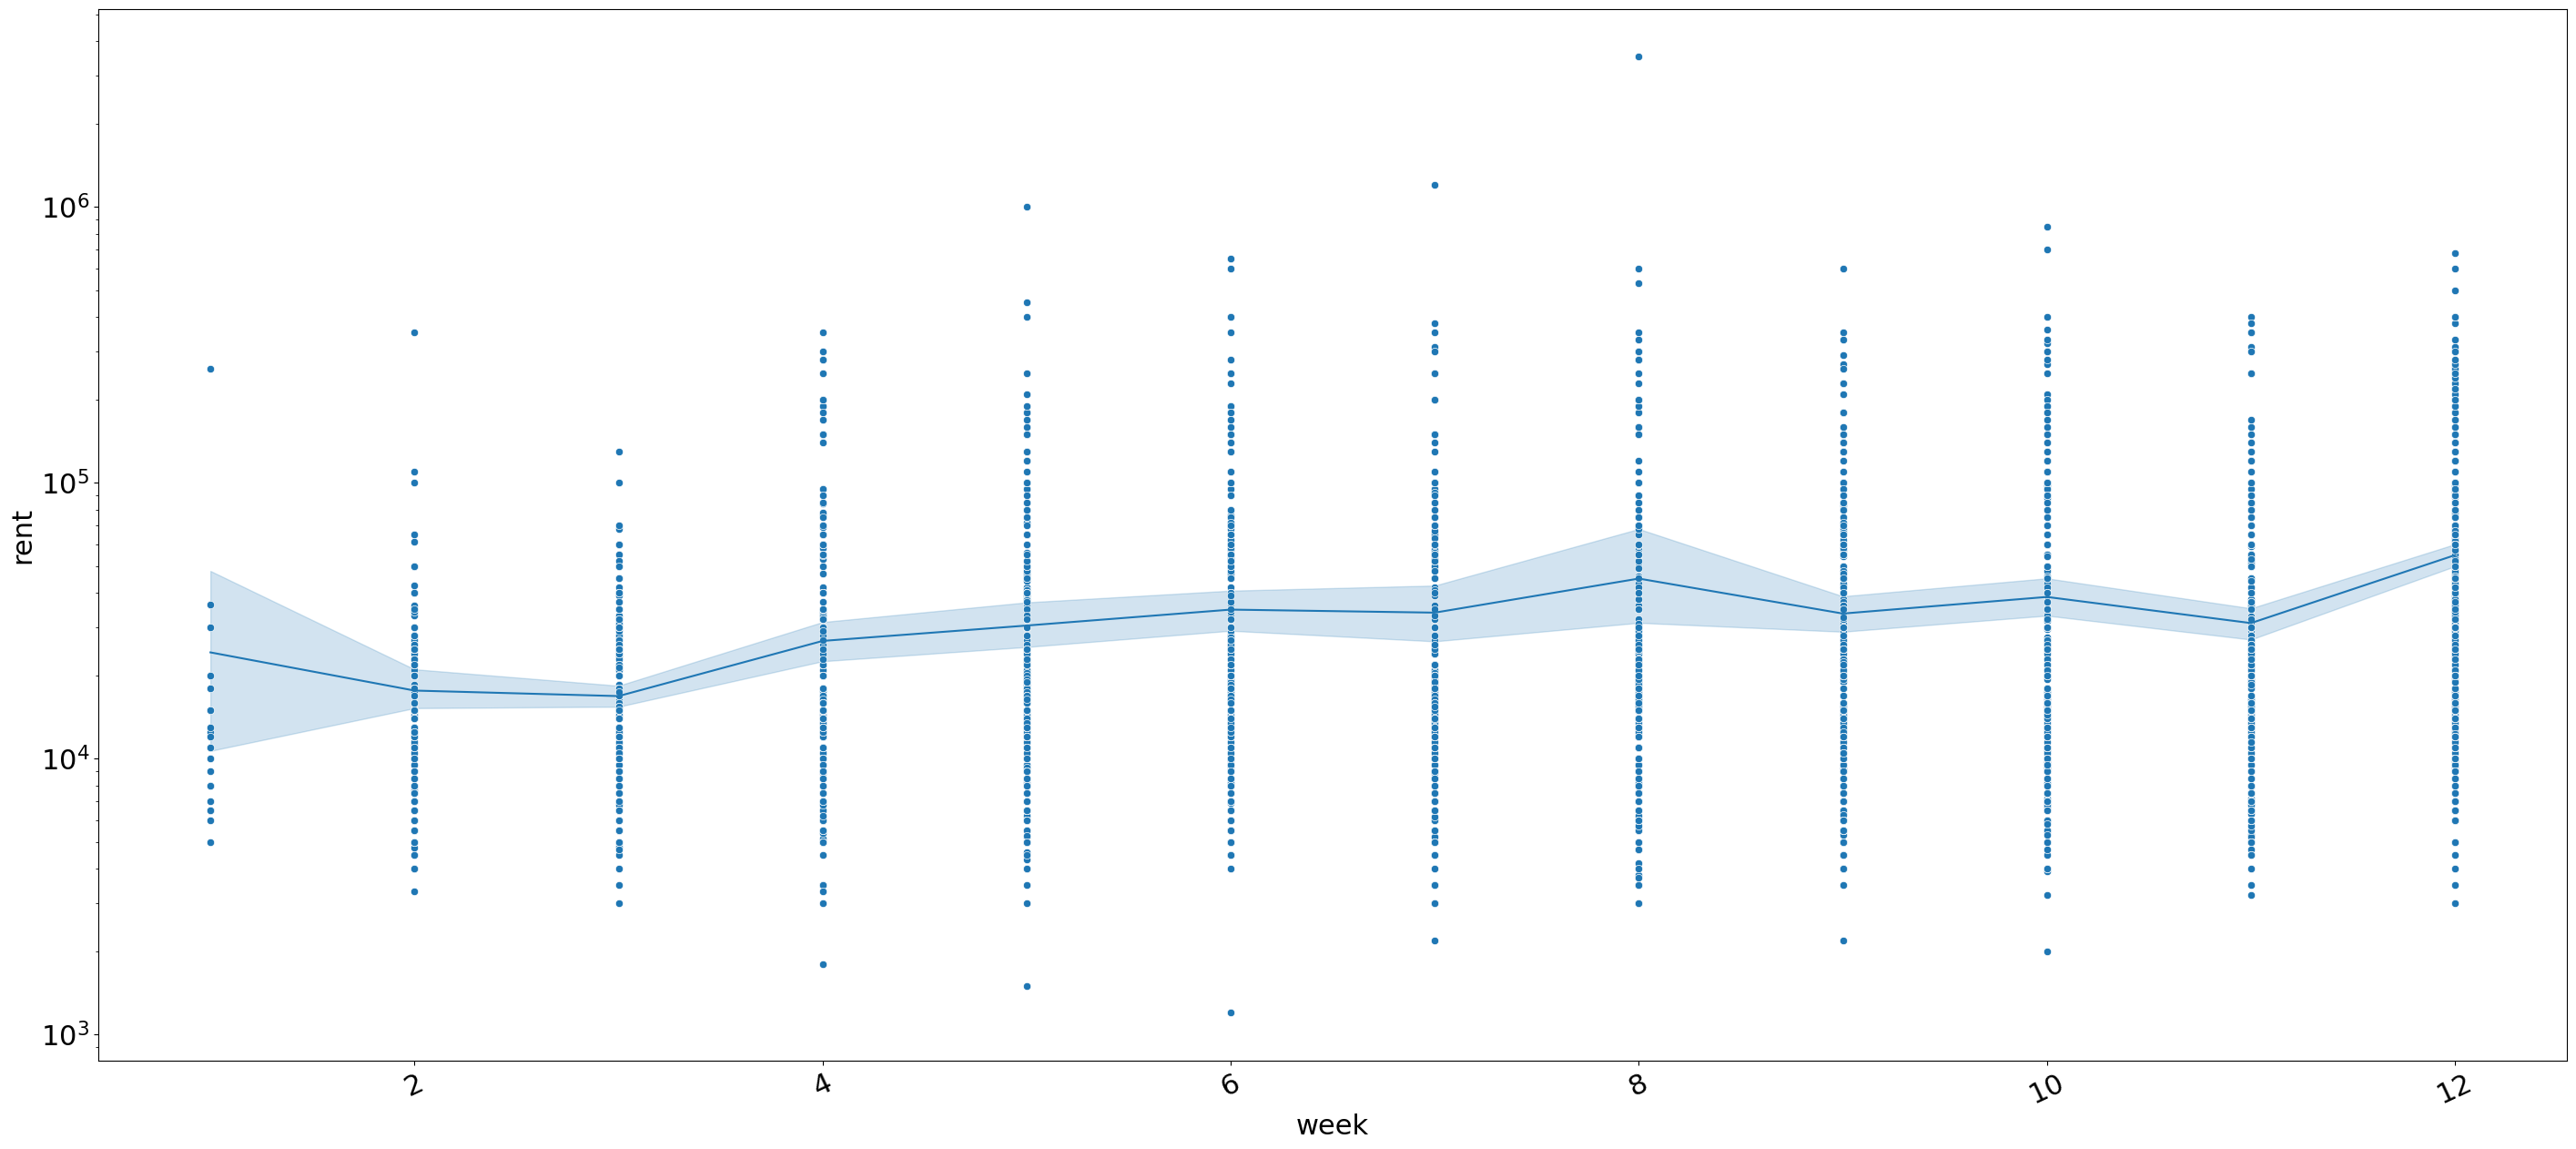

In [34]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="week", y="rent",
             data=df_grouped_week)
sns.scatterplot(x="week", y="rent",
             data=df_grouped_week)

plt.xticks( rotation=25 )
plt.yscale('log')
plt.show()

Now, without the dots and only with average of each week and variance, we can apply a bestfit linear regression.

slope =  2680.7510500625926 , y-intercept 14649.454157163012


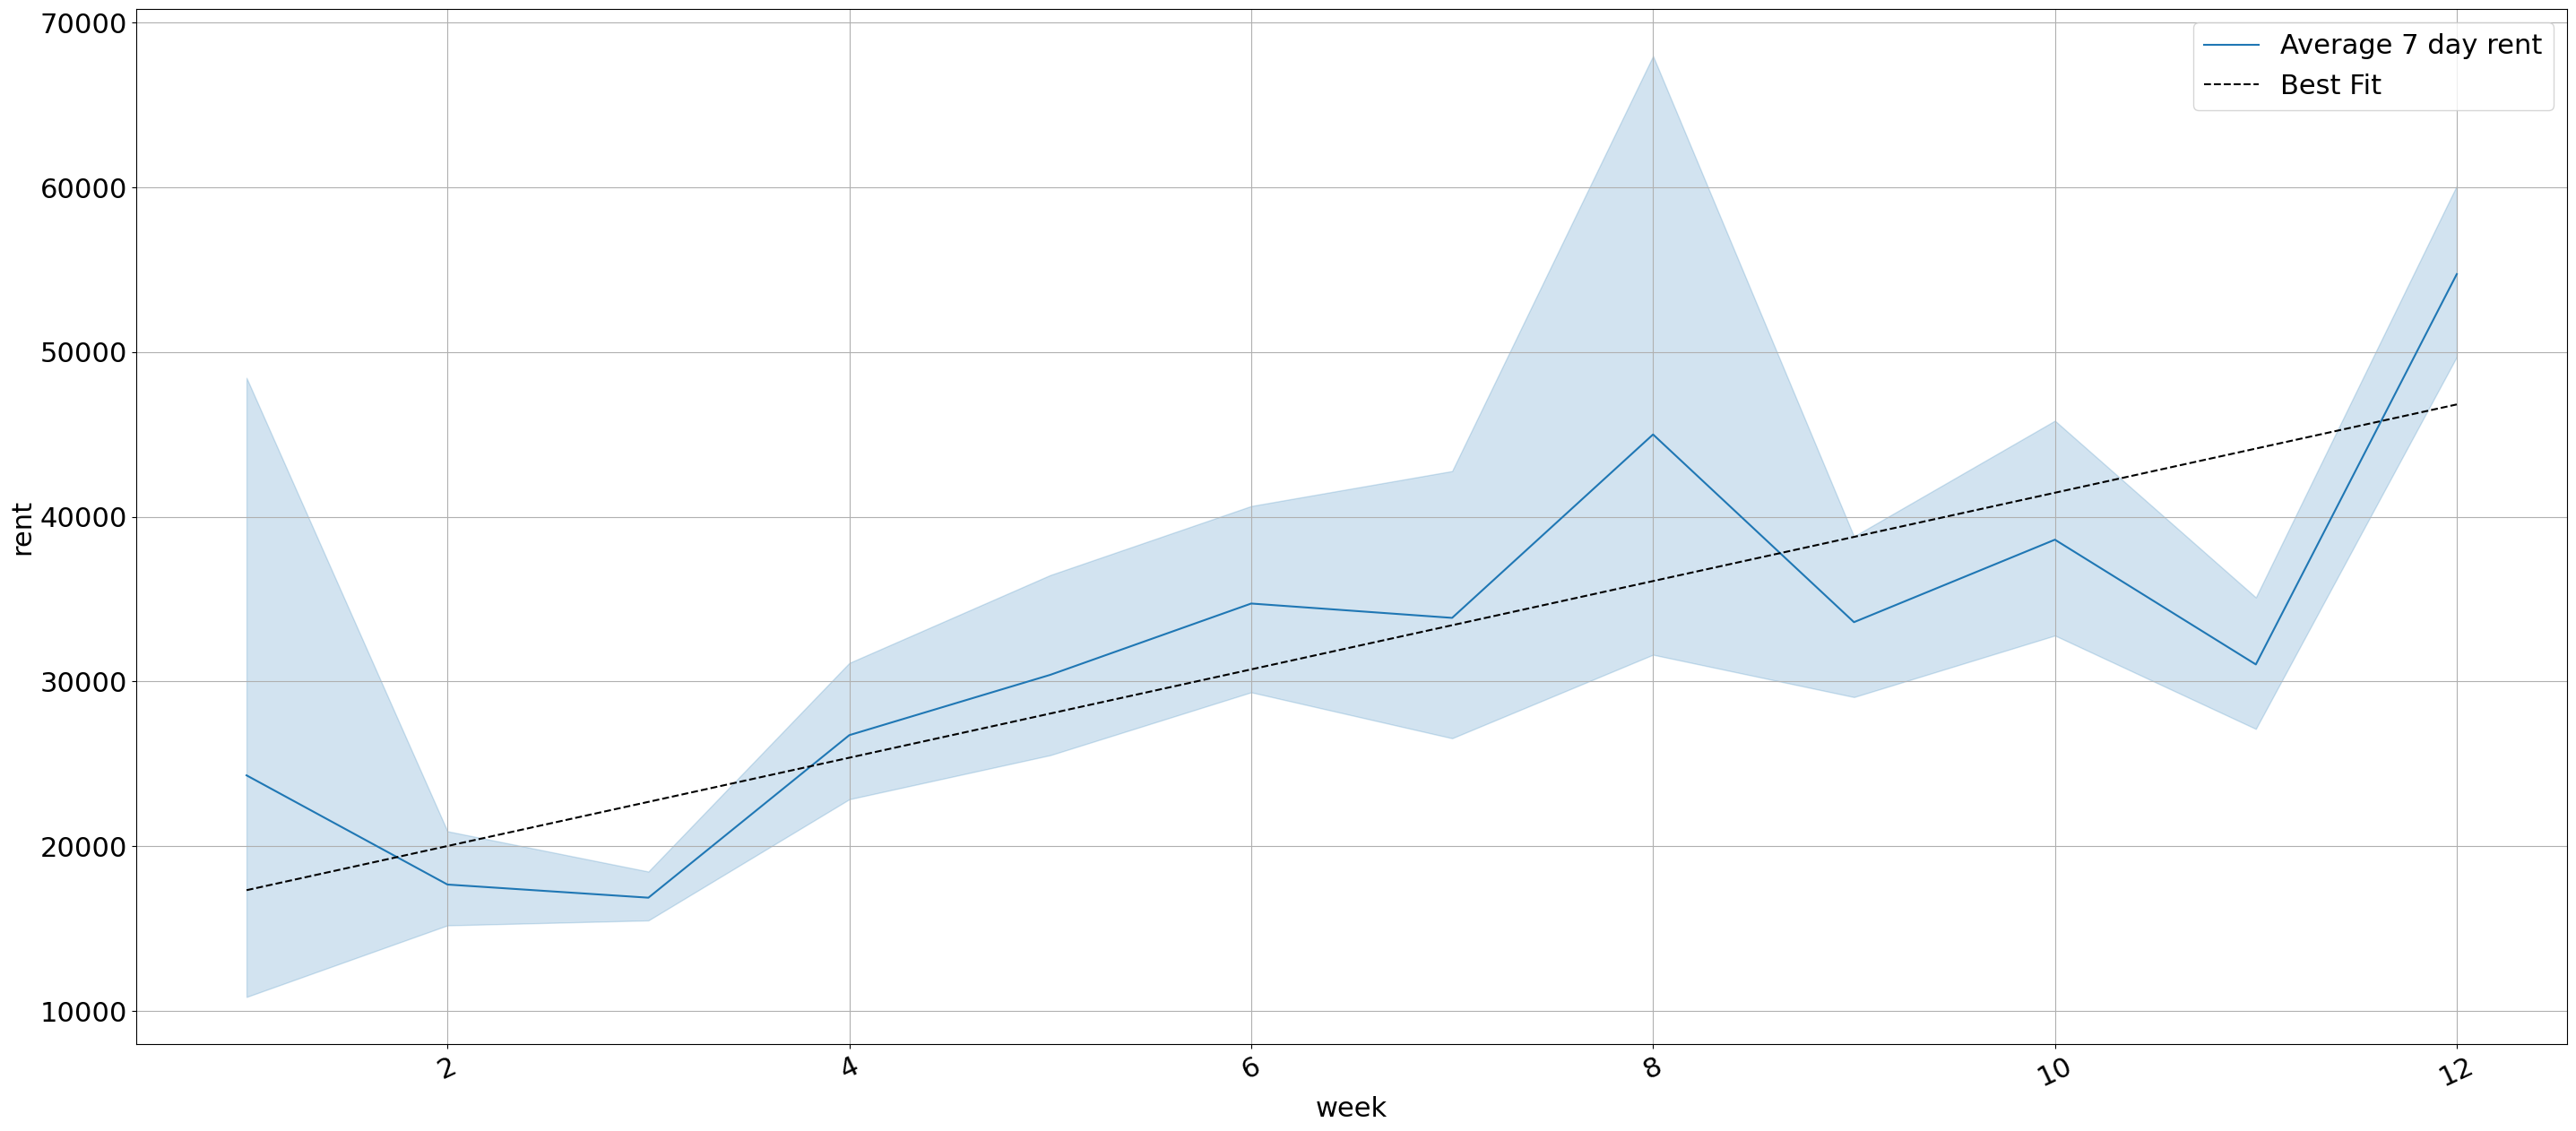

In [35]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="week", y="rent",
             data=df_grouped_week,label='Average 7 day rent')
m, c = np.polyfit(df_grouped_week.week, df_grouped_week.rent, 1)
print('slope = ',m,', y-intercept', c)
plt.plot([ 1,12], [m+c,m*12+c], 'k--',label='Best Fit')
plt.xticks( rotation=25 )
plt.legend()
plt.grid()
plt.show()

slope =  382.01770393302183 , y-intercept 16750.93882246856


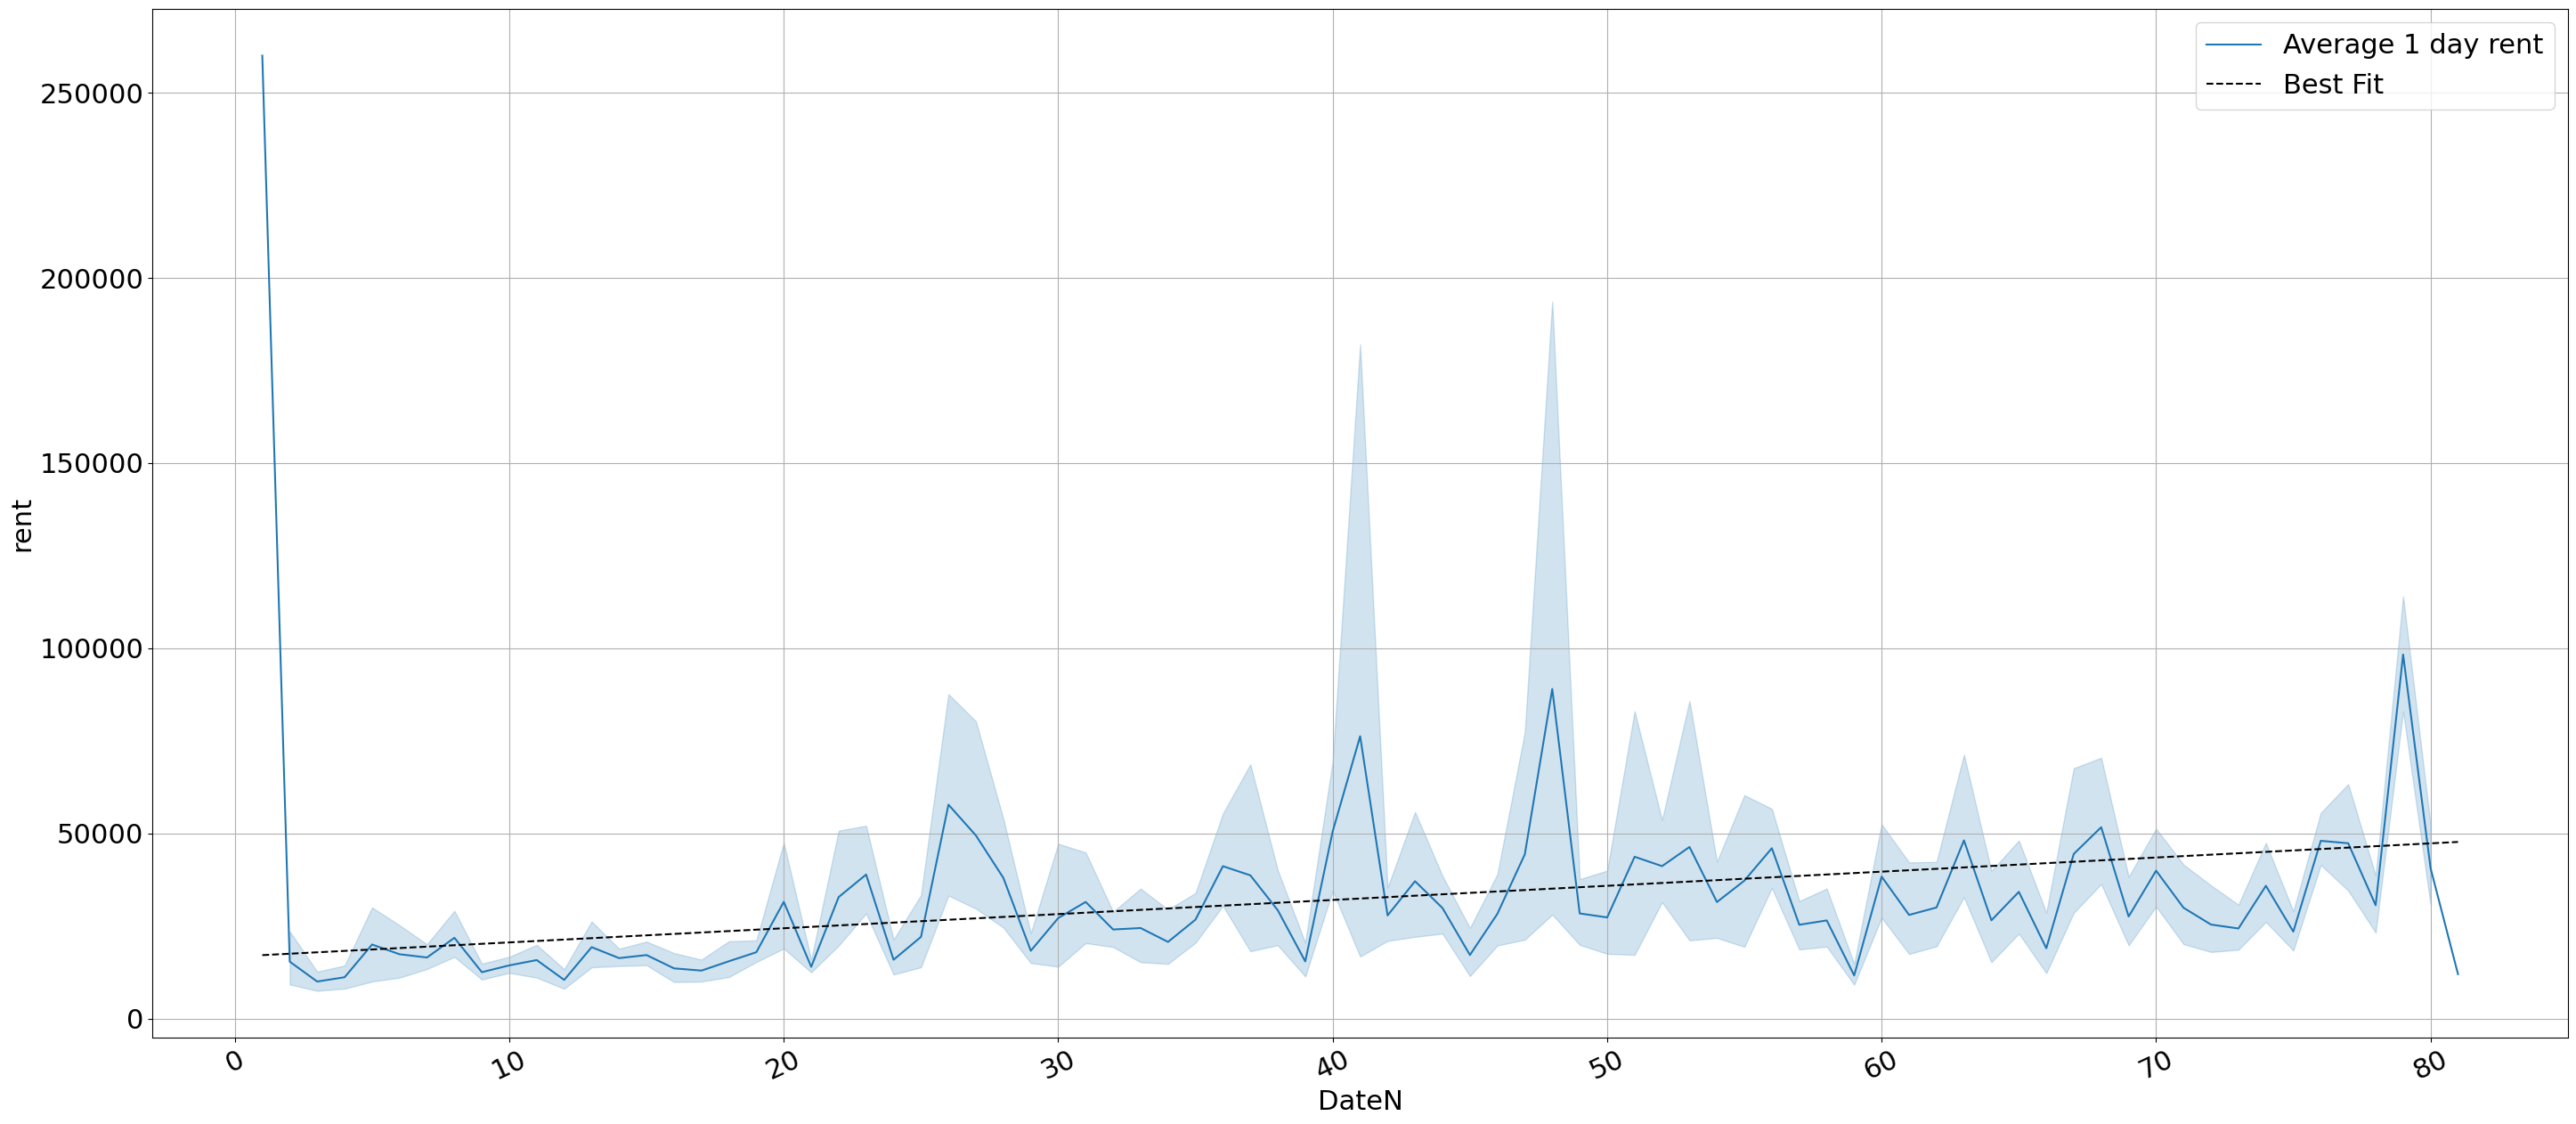

In [36]:
plt.figure(figsize=(35, 15))
sns.lineplot(x="DateN", y="rent",
             data=df,label='Average 1 day rent')
m, c = np.polyfit(df.DateN, df.rent, 1)
print('slope = ',m,', y-intercept', c)

plt.plot([ 1,81], [m+c,m*81+c], 'k--',label='Best Fit')
plt.xticks( rotation=25 )
plt.legend()
plt.grid()
plt.show()

Above is the same plot as above but now with 1 day average. The regression characteristic values are shown above the graph.

<Figure size 640x480 with 0 Axes>

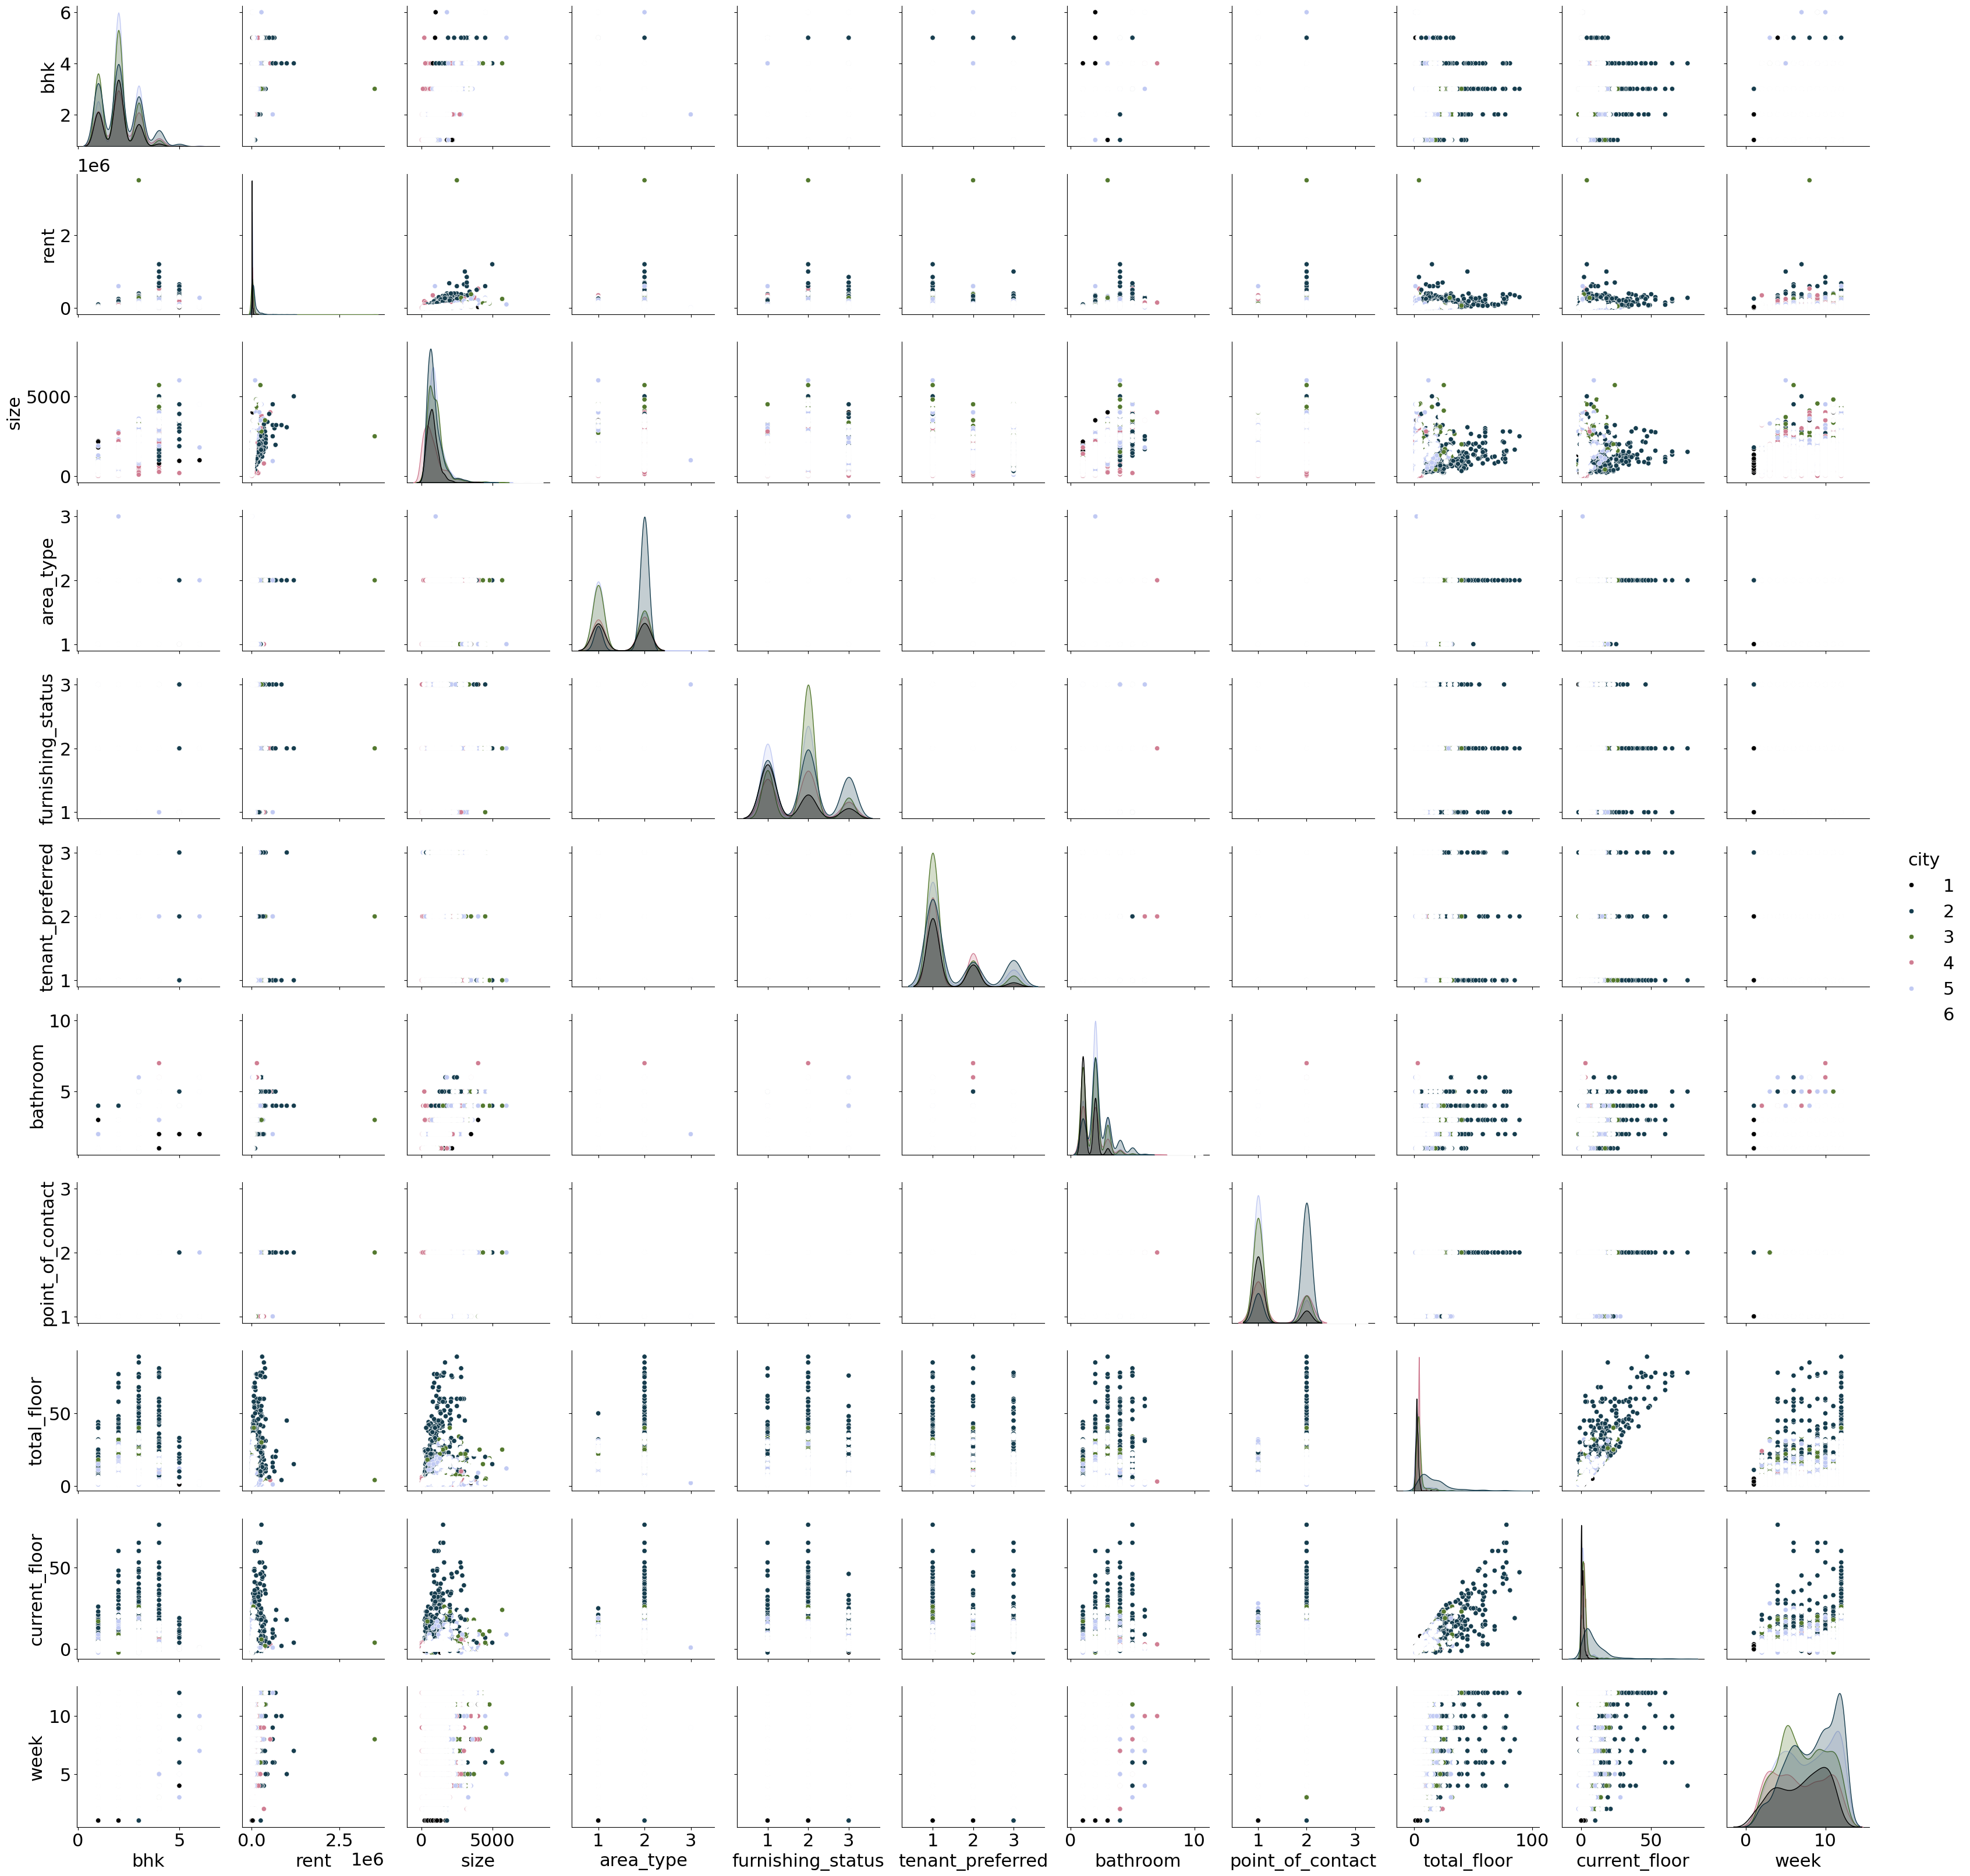

In [37]:
var_to_use = ["bhk","rent","size","area_type","city","furnishing_status","tenant_preferred","bathroom","point_of_contact","total_floor","current_floor","week"]
plt.figure()
sns.pairplot(df_grouped_week[var_to_use], hue="city", size=3,palette='cubehelix')
plt.show()

As briefly mentioned before, some features in the data set can be classified as subsets of other features (i.e. 'bhk', 'bathroom' and 'size' or 'total_floor' and 'current_floor'). Addionally, as shown in the scatter plot matrix above, a majority of our features classify as nominal or ordinal values. For this reason, we decided to transform the features into two principle components using PCA.

## Dimensionality Reduction

pca: [[ 0.27929753  0.33569221  0.43783971 -0.16567305  0.36937047  0.13823485
   0.20463942  0.45939215  0.4262518 ]
 [ 0.57796337 -0.27357261 -0.11346007  0.50174513  0.49200205  0.18610603
  -0.07976187 -0.1210488  -0.16964304]]


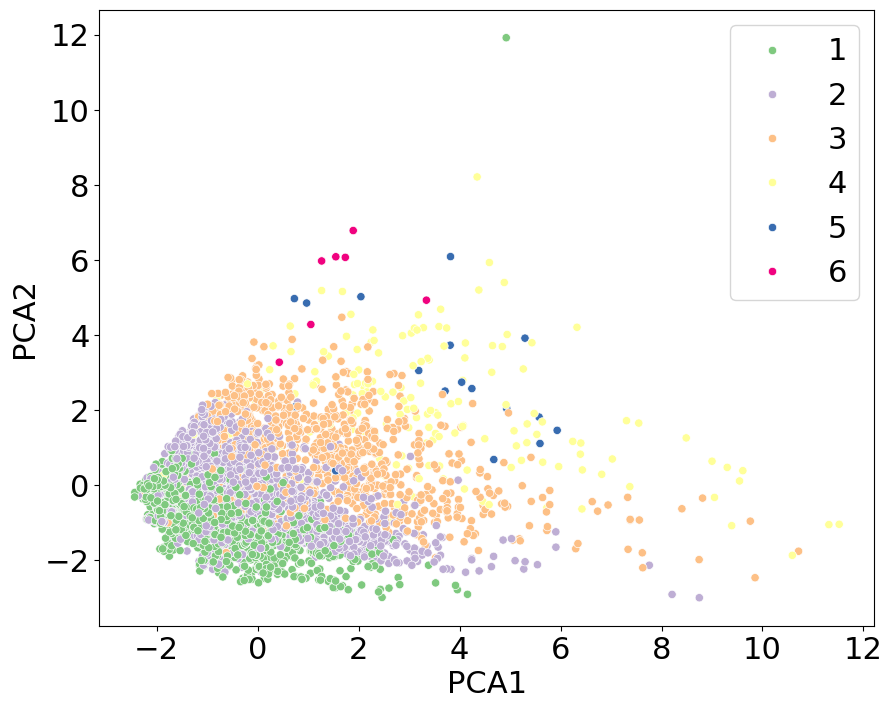

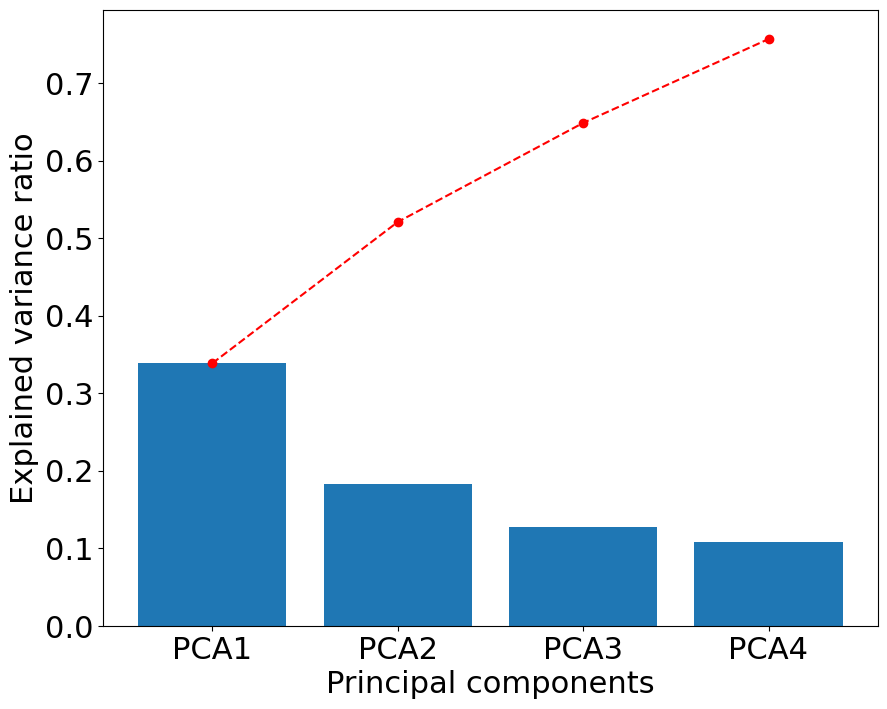

In [38]:
#sourced from example provied for the assingment.
#https://www.dropbox.com/sh/yinn3v3qnzlbep5/AAA-i1u-4ylyxwiCb8nyEDY7a?dl=0 (accessed 2022/9/11)

from sklearn.decomposition import PCA
from sklearn import preprocessing

var=['size','area_type','current_floor','city','bathroom',"furnishing_status",'tenant_preferred','total_floor',"point_of_contact"]
df_scaled = df[var].copy()
df_scaled = preprocessing.scale(df_scaled,axis=0)
df_scaled=pd.DataFrame(df_scaled,columns=var)
df_scaled


X = df_scaled
Y = df.bhk

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

# print the components
print ('pca:', pca.components_)

def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.1f*%s ' % (comp[fidx],f[:])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, df_scaled.columns) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

# from pandas.tools.plotting import scatter_plot
plt.figure(figsize=[10,8])

# scatter plot the output, with the names created from the weights
sns.scatterplot(x=df_pca.iloc[:, 0],y=df_pca.iloc[:, 1],hue=Y,palette='Accent')
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


pca = PCA(n_components=4)
X_pca = pca.fit(X)

explained_var = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(explained_var)

plt.figure(figsize=[10,8])
plt.bar(['PCA1','PCA2','PCA3','PCA4'],explained_var,label='individual explained variance')
plt.plot(['PCA1','PCA2','PCA3','PCA4'],cum_var_exp,'or--',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel("Principal components")
plt.show()

Now using Principle Component Analysis, we reduced the data dimension from 9 to 2, and if additional used with the bedroom column information, we can use the phase space seen above, which has distinguishable boarder. From the bottom plot, we see that first and second Principle Component makes about 50% of the varaiance in PCA space.

### Reference

Kaggle. House Rent Prediction Dataset. https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?select=House_Rent_Dataset.csv (Accessed 09-04-2022)